In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
import torch

In [ ]:
X = torch.tensor([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
limit = int(input())

larger_than_limit_sum = (X[X > limit]).sum()

print(larger_than_limit_sum)

# Неделя 2. Строим первую нейронную сеть

2.6 Семинар: Реализация градиентного спуска (часть 1)

In [ ]:
import torch

Допустим, у нас есть функция f(x)=loge(x +3)f(x) = log_{e}(x + 3)f(x)=loge​(x +3). Мы выбрали начальное приближение xt=0 =7x^{t=0} = 7xt=0 =7 . И шаг градиентного спуска α=10\alpha=10α=10

Чему будет равен xt=1x^{t=1}xt=1? 

In [ ]:
x = torch.tensor(7.0, requires_grad=True)
f = torch.log(x + 3)
f.backward()
lr = 10
x.data = x.data - lr * x.grad.data
print(x.data)

Допустим, у нас есть функция f(X)=∑loge(xij+1)f(X) = \sum{log_{e}(x_{ij} + 1)}f(X)=∑loge​(xij​+1), где XXX - тензор размера 2x2. Мы выбрали начальное приближение Xt=0 =[[1,2],[4,5]]X^{t=0} = [[1, 2], [4, 5]]Xt=0 =[[1,2],[4,5]] . И шаг градиентного спуска α=10\alpha=10α=10

Чему будет равен Xt=1X^{t=1}Xt=1? 

In [ ]:
X = torch.tensor([[1.0, 2.0], [4.0, 5.0]], requires_grad=True)
f = torch.log(X + 1).sum()
f.backward()
lr = 10
X.data = X.data - lr * X.grad.data
print(X.data)

Реализуйте расчет градиента для функции f(w)=∏i,jloge(loge(wi,j +7))f(w) = \prod\limits_{i,j}{log_{e}(log_{e}({w_{i,j} + 7}}))f(w)=i,j∏​loge​(loge​(wi,j​ +7)) в точке w =[[5,10],[1,2]]w = [[5, 10], [1, 2]]w =[[5,10],[1,2]]

Подсказка: перемножить все значения функции можно с помощью метода .prod()

In [ ]:
w = torch.tensor([[5.,10.],
                  [1.,2.]], requires_grad=True)

#######
device = torch.device('cuda:0' 
                      if torch.cuda.is_available() 
                      else 'cpu')
w = w.to(device)
#######

function = torch.log(torch.log(w + 7)).prod()
#function = (w+7).log().log().prod()

function.backward()

print(w.grad, '<- gradient')

# Неделя 3. Задачи решаемые при помощи нейронных сетей

**3.4 Теоретические задачи: Функции потерь**

Пусть имеется монетка, которую мы подбрасывали NNN раз, и MMM раз монетка выпала орлом вверх. Мы будем восстанавливать вероятность выпадения орла ppp при помощи минимизации бинарной кросс-энтропии:

p~=arg⁡min⁡p∑i=1N(−tilog⁡p−(1−ti)log⁡(1−p)),\tilde{p} = \arg\min_p \sum_{i=1}^N \left( - t_i \log p - (1 - t_i) \log(1 - p) \right),
p~​=argpmin​i=1∑N​(−ti​logp−(1−ti​)log(1−p)),где arg⁡min⁡xf(x)\arg\min_x f(x)argminx​f(x) -- значение xxx, при котором fff минимальна, ti=1t_i = 1ti​=1 в том случае, когда выпал орел и ti=0t_i = 0ti​=0 в том случае, когда выпала решка.

In [ ]:
import sympy as sp

p, n, m = sp.symbols("p n m")
expr = -(m * sp.log(p) + (n-m) * sp.log(1-p)) # расписали сумму
diff_expr = expr.diff(p) # производная
sp.solve(diff_expr, 0, p) # решение

**3.5 Семинар: Строим первую нейронную сеть**

Давайте попрактикуемся с SineNet:

1) Добавим еще один fc-слой

2) Заменим активацию между слоями на гиперболический тангенс

In [ ]:
#было
class SineNet(torch.nn.Module):
    def __init__(self, n_hidden_neurons):
        super(SineNet, self).__init__()
        self.fc1 = torch.nn.Linear(1, n_hidden_neurons)
        self.act1 = torch.nn.Sigmoid()
        self.fc2 = torch.nn.Linear(n_hidden_neurons, 1)

    def forward(self, x):
        x = self.fc1(x)
        x = self.act1(x)
        x = self.fc2(x)
        return x

sine_net = SineNet(50)

In [ ]:
#Решение
import torch

class SineNet(torch.nn.Module):
    def __init__(self, n_hidden_neurons):
        super(SineNet, self).__init__()
        self.fc1 = torch.nn.Linear(1, n_hidden_neurons)
        self.act1 = torch.nn.Tanh()
        self.fc2 = torch.nn.Linear(n_hidden_neurons, n_hidden_neurons)
        self.act2 = torch.nn.Tanh()
        self.fc3 = torch.nn.Linear(n_hidden_neurons, 1)

    def forward(self, x):
        x = self.fc1(x)
        x = self.act1(x)
        x = self.fc2(x)
        x = self.act2(x)
        x = self.fc3(x)
        return x

sine_net = SineNet(int(input()))
sine_net.forward(torch.Tensor([1.]))

print(sine_net)

3.5.6 Семинар: Строим первую нейронную сеть

Обучим нейронную сеть для задачи регрессии:

Возьмем более сложную функцию в качестве таргета: y=2xsin(2−x)y=2^x sin(2^{-x})y=2xsin(2−x).

Кроме того, мы хотим получить хорошую метрику MAE на валидации: MAE=1l∑i=1l∣y_predi−y_targeti∣{MAE} = {\frac {1}{l}}\sum _{i=1}^{l}{|y\_pred_{i}-{y\_target_{i}}|}MAE=l1​∑i=1l​∣y_predi​−y_targeti​∣, тогда как знакомая нам MSE выглядит как MSE=1l∑i=1l(y_predi−y_targeti)2{MSE} = {\frac {1}{l}}\sum _{i=1}^{l}(y\_pred_{i}-{y\_target_{i}})^{2} MSE=l1​∑i=1l​(y_predi​−y_targeti​)2

Вот пример того, как нейросеть может отрабатывать на данной функции:

Данный пример показывает MAE на валидации ~0.021 . Получите метрику не хуже 0.03

In [ ]:
import torch
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['figure.figsize'] = (13.0, 5.0)

def target_function(x):
    return 2**x * torch.sin(2**-x)

class RegressionNet(torch.nn.Module):
    def __init__(self, n_hidden_neurons):
        super(RegressionNet, self).__init__()
        self.fc1 = torch.nn.Linear(1, n_hidden_neurons)
        self.act1 = torch.nn.Sigmoid()
        self.fc2 = torch.nn.Linear(n_hidden_neurons, 1)

    def forward(self, x):
        x = self.fc1(x)
        x = self.act1(x)
        x = self.fc2(x)
        return x

net = RegressionNet(100)

# ------Dataset preparation start--------:
x_train =  torch.linspace(-10, 5, 100)
y_train = target_function(x_train)
noise = torch.randn(y_train.shape) / 20.
y_train = y_train + noise
x_train.unsqueeze_(1)
y_train.unsqueeze_(1)

x_validation = torch.linspace(-10, 5, 100)
y_validation = target_function(x_validation)
x_validation.unsqueeze_(1)
y_validation.unsqueeze_(1)
# ------Dataset preparation end--------:


optimizer = torch.optim.Adam(net.parameters(), lr=0.01)

def loss(pred, target):
    return ((pred - target) ** 2).mean()

for epoch_index in range(2000):
    optimizer.zero_grad()

    y_pred = net.forward(x_train)
    loss_value = loss(y_pred, y_train)
    loss_value.backward()
    optimizer.step()

#Проверка осуществляется вызовом кода:
def metric(pred, target):
    return (pred - target).abs().mean()

print(metric(net.forward(x_validation), y_validation).item())
# (раскомментируйте, если решаете задание локально)

In [ ]:
def predict(net, x, y):
    y_pred = net.forward(x)

    plt.plot(x.numpy(), y.numpy(), 'o', label='Groud truth')
    plt.plot(x.numpy(), y_pred.data.numpy(), 'o', c='r', label='Prediction');
    plt.legend(loc='upper left')
    plt.xlabel('$x$')
    plt.ylabel('$y$')

predict(net, x_validation, y_validation)

In [ ]:
#решение от https://stepik.org/lesson/236236/step/15?discussion=1641231&thread=solutions&unit=208641
import torch
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['figure.figsize'] = (15.0, 5.0)

# Создание набора тренировочных и тестовых данных
def target_function(x):
    return 2**x * torch.sin(2**-x)

# ------Dataset preparation start--------:
x_train =  torch.linspace(-10, 5, 100)
y_train = target_function(x_train)
noise = torch.randn(y_train.shape) / 20.
y_train = y_train + noise
x_train.unsqueeze_(1)
y_train.unsqueeze_(1)

x_validation = torch.linspace(-10, 5, 100)
y_validation = target_function(x_validation)
x_validation.unsqueeze_(1)
y_validation.unsqueeze_(1)
# ------Dataset preparation end--------:

# Визуализация подготовленных данных
plt.plot(x_train.numpy(), y_train.numpy(), 'o', label='train dataset')
# Визуализация тестовых данных
plt.plot(x_validation.numpy(), y_validation.numpy(), '-', label='validation dataset')
# Визуализация валидационных данных
plt.title('2**x * torch.sin(2**-x)')
plt.legend(loc='upper left')
plt.xlabel('x_validation')
plt.ylabel('y_validation')
plt.show()

In [ ]:
# Функция оценки качества работы неросейти
def metric(pred, target):
    return (pred - target).abs().mean()

# Создание класса нейросети L-S-L-S-L (два скрытых слоя нейронов)
class RegressionNet(torch.nn.Module):
  def __init__(self, n_hidden_neurons):
    super(RegressionNet, self).__init__()
    self.fc1 = torch.nn.Linear(1, n_hidden_neurons)
    self.act1 = torch.nn.Sigmoid()
    self.fc2 = torch.nn.Linear(n_hidden_neurons, n_hidden_neurons)
    self.act2 = torch.nn.Sigmoid()
    self.fc3 = torch.nn.Linear(n_hidden_neurons, 1)

  # Функция определяющая последовательность применения слоев. x - это входное значение.
  # значение x последовательно обрабатывается слоями и активационными функциями.
  def forward(self, x):                               
    x = self.fc1(x)                                   
    x = self.act1(x)
    x = self.fc2(x)
    x = self.act2(x)
    x = self.fc3(x)
    return x

# Создаем экземпляр класса нейросети
net = RegressionNet(5)

# Задаем оптимизатор для нейросети
optimizer = torch.optim.Adam(net.parameters(), lr=0.01)

# Задаем фенкцию потерь
def loss(pred, target):
  # mae = abs(pred - target)
  # return mae.mean()
  squares = (pred - target) ** 2
  return squares.mean()

При обучении нейросети записывается история изменения функции потерь (loss функции)
и при завершении обучения сети выводиться график это функции.
Таким образом можно визуализировать процесс обучения сети, наблюдать как меняется ошибка в процессе обучения.

In [ ]:
epoch_num = 2000
loss_history = [[0,0] for i in range(epoch_num)]

for epoch_index in range(epoch_num):
  optimizer.zero_grad()

  y_pred = net.forward(x_train)
  loss_value = loss(y_pred, y_train)
  
  loss_history[epoch_index][0] = epoch_index
  loss_history[epoch_index][1] = loss_value.data.numpy().tolist()

  loss_value.backward()
  optimizer.step()

# При построении отсекается первые 100 значений,
# так как функция сначала имеет большие значения и начинает резко сходиться
plt.plot([row[0] for row in loss_history][100:], [row[1] for row in loss_history][100:], '.')
plt.title(label='Loss function')
plt.xlabel('Epoch_index')
plt.ylabel('Error');
plt.show()

Теперь смотрим на результат работы нейросети

In [ ]:
def predict(net, x, y):
  y_pred = net.forward(x)
  
  # Визуализация тестовых данных
  plt.plot(x.numpy(), y.numpy(), '-', label='Ground trurh')                     
  # Визуализация предсказания нейросети данных
  plt.plot(x.numpy(), y_pred.data.numpy(), 'x', c='g', label='Prediction')      
  plt.title('2**x * torch.sin(2**-x)')
  plt.legend(loc='upper left')
  plt.xlabel('x')
  plt.ylabel('y')                                                             
  plt.show()

# Визуализация работы нейросети
predict(net, x_validation, y_validation)

# Проверка качества нейросети (погрешность)
print(metric(net.forward(x_validation), y_validation).item())

In [ ]:
import random
random.seed(464466656562)

In [ ]:
random.randint(0, 100)

**3.6 Семинар: Классификация в PyTorch**

Давайте попрактикуемся с WineNet. Измените архитектуру так, чтобы на вход принимались все 13 признаков и проведите следующие эксперименты:

1. Поэкспериментируйте с количеством нейронов в скрытых слоях. Попробуйте поставить очень маленькое число. Существует ли пороговое значение количества скрытых нейронов, при котором обучение становится невозможным?

2. Попробуйте передавать различные значения test_size в функцию train_test_split. При каком значении test_size сеть предсказывает хуже чем Base Rate*? И какой Base Rate у датасета вин?

3. Зависит ли время обучения на одной эпохе от размера батча? Исследуйте эту зависимость.

Поделитесь своими выводами в комментариях :)

*Base Rate - значение accuracy для случая, когда модель для всех объектов предсказывает самый частотный класс в датасете

In [ ]:
import torch
import random
import numpy as np
import pandas as pd

random.seed(0)
np.random.seed(0)
torch.manual_seed(0)
torch.cuda.manual_seed(0)
torch.backends.cudnn.deterministic = True

In [ ]:
import sklearn.datasets
wine = sklearn.datasets.load_wine()
wine.data.shape

In [ ]:
wine.data.shape[1]

In [ ]:
pd.DataFrame(wine.data)

In [ ]:
pd.DataFrame(wine.target).value_counts()

In [ ]:
base_rate = pd.DataFrame(wine.target).value_counts().max()/pd.DataFrame(wine.target).count()
base_rate

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    wine.data, 
    wine.target, 
    test_size=0.3, 
    shuffle=True)

X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [ ]:
class WineNet(torch.nn.Module):
    def __init__(self, n_hidden_neurons):
        super(WineNet, self).__init__()
        
        self.fc1 = torch.nn.Linear(13, n_hidden_neurons)
        self.activ1 = torch.nn.Sigmoid()
        # self.fc2 = torch.nn.Linear(n_hidden_neurons, n_hidden_neurons)
        # self.activ2 = torch.nn.Sigmoid()
        self.fc3 = torch.nn.Linear(n_hidden_neurons, 3)
        self.sm = torch.nn.Softmax(dim=1)
        
    def forward(self, x):
        x = self.fc1(x)
        x = self.activ1(x)
        # x = self.fc2(x)
        # x = self.activ2(x)
        x = self.fc3(x)
        return x

    def inference(self, x):
        x = self.forward(x)
        x = self.sm(x)
        return x
    
wine_net = WineNet(30)

In [ ]:
loss = torch.nn.CrossEntropyLoss()

optimizer = torch.optim.Adam(wine_net.parameters(), 
                             lr=1.0e-3)

In [ ]:
batch_size = 1000

for epoch in range(5000):
    order = np.random.permutation(len(X_train))
    for start_index in range(0, len(X_train), batch_size):
        optimizer.zero_grad()
        
        batch_indexes = order[start_index:start_index+batch_size]
        
        x_batch = X_train[batch_indexes]
        y_batch = y_train[batch_indexes]
        
        preds = wine_net.forward(x_batch) 
        
        loss_value = loss(preds, y_batch)
        loss_value.backward()
        
        optimizer.step()
        
    if epoch % 100 == 0:
        test_preds = wine_net.forward(X_test)
        test_preds = test_preds.argmax(dim=1)
        print((test_preds == y_test).float().mean())

#4 Неделя. Методы оптимизации.

**4.4.1 Семинар: Классификация рукописных чисел полносвязанной сетью**

Попрактикуемся с методом reshape. У нас есть трехмерный тензор размерности (6000, 28, 28) . Сопоставьте операцию над этим тензором и её результатат:

In [ ]:
import torch
import random
import numpy as np

In [ ]:
x = torch.tensor(np.random.default_rng(42).random((6000,28,28)))
x.shape

In [ ]:
x.reshape(-1).shape

In [ ]:
x.reshape(-1,1,1).shape

In [ ]:
x.reshape(len(x[1]), len(x), len(x[2])).shape

In [ ]:
x.reshape(-1,14,32,7).shape

In [ ]:
x.reshape(-1,9).shape

In [ ]:
x.reshape(-1,6000).shape

Проверяем доступность GPU

In [ ]:
torch.cuda.is_available()

In [ ]:
!nvidia-smi

In [ ]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

**4.4.5 Семинар: Классификация рукописных чисел полносвязанной сетью**

Запустите код из видео на GPU. В последнем шаге мы рисовали график accuracy и loss на валидации. А что с ними происходит на train'е?

    Постройте на одном графике loss для train и validation.
    Правда ли, что loss на train и validation падает одинаково быстро и выходит на одинаковое значение, или же у нас есть переобучение?
    Ведет ли увеличение количества эпох (40 эпох -> 200 эпох) к улучшению метрик на валидации?
    Замерьте время вычисления 100 эпох на CPU и на GPU. Какое ускорение вы наблюдаете?
    Замедляет ли torch.backends.cudnn.deterministic = True обучение на практике? Если да, то насколько?
    Попробуйте разные методы градиентного спуска, которые были в лекции. Как выбор градиентного спуска влияет на accuracy? Для уверенности лучше проводить один эксперимент 3-5 раз на разных random seed: так вы поймете, действительно ли сказывается влияние метода или дело в случайности.


In [ ]:
import torch
import random
import numpy as np

random.seed(0)
np.random.seed(0)
torch.manual_seed(0)
torch.cuda.manual_seed(0)
torch.backends.cudnn.deterministic = True

In [ ]:
import torchvision.datasets
MNIST_train = torchvision.datasets.MNIST('./', download=True, train=True)
MNIST_test = torchvision.datasets.MNIST('./', download=True, train=False)

In [ ]:
X_train = MNIST_train.train_data
y_train = MNIST_train.train_labels
X_test = MNIST_test.test_data
y_test = MNIST_test.test_labels

In [ ]:
X_train.dtype, y_train.dtype

In [ ]:
X_train = X_train.float()
X_test = X_test.float()

In [ ]:
X_train.shape, X_test.shape

In [ ]:
y_train.shape, y_test.shape

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0, :, :])
plt.show()
print(y_train[0])

In [ ]:
X_train = X_train.reshape([-1, 28 * 28])
X_test = X_test.reshape([-1, 28 * 28])

In [ ]:
class MNISTNet(torch.nn.Module):

    def __init__(self, n_hidden_neurons):
        super(MNISTNet, self).__init__()
        self.fc1 = torch.nn.Linear(28 * 28, n_hidden_neurons)
        self.ac1 = torch.nn.Sigmoid()
        self.fc2 = torch.nn.Linear(n_hidden_neurons, 10)
    
    def forward(self, x):
        x = self.fc1(x)
        x = self.ac1(x)
        x = self.fc2(x)
        return x

mnist_net = MNISTNet(100)


In [ ]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
mnist_net = mnist_net.to(device)
#list(mnist_net.parameters())

In [ ]:
loss = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(mnist_net.parameters(), lr=1.0e-3)

In [ ]:
X_test = X_test.to(device)
y_test = y_test.to(device)

In [ ]:
y_test

In [ ]:
batch_size = 100

test_accuracy_history = []
test_loss_history = []
train_accuracy_history = []
train_loss_history = []

X_test = X_test.to(device)
y_test = y_test.to(device)

for epoch in range(100):
    order = np.random.permutation(len(X_train))

    train_accuracy_epoch = []
    train_loss_epoch = []
    
    for start_index in range(0, len(X_train), batch_size):
        optimizer.zero_grad()
        
        batch_indexes = order[start_index:start_index+batch_size]
        
        X_batch = X_train[batch_indexes].to(device)
        y_batch = y_train[batch_indexes].to(device)
        
        preds = mnist_net.forward(X_batch)
        
        loss_value = loss(preds, y_batch)
        train_loss_epoch.append(loss_value)

        loss_value.backward()
        
        train_accuracy_epoch.append((preds.argmax(dim=1) == y_batch).float().mean())

        optimizer.step()

    test_preds = mnist_net.forward(X_test)
    test_loss_history.append(loss(test_preds, y_test))
    train_loss_history.append(torch.stack(train_loss_epoch).float().mean())

    accuracy_test = (test_preds.argmax(dim=1) == y_test).float().mean()
    accuracy_train = torch.stack(train_accuracy_epoch).float().mean()
    test_accuracy_history.append(accuracy_test)
    train_accuracy_history.append(accuracy_train)
    print('epoch = {}, accuracy_test = {}, accuracy_train = {}'.format(epoch, accuracy_test, accuracy_train))

In [ ]:
plt.plot(test_accuracy_history) #blue
plt.plot(train_accuracy_history) #orange

In [ ]:
plt.plot(test_loss_history)  #blue
plt.plot(train_loss_history) #orange

Решение с функцией, для гибкой настройки параметров и профилирования

In [ ]:
import torch
import random
import numpy as np

import matplotlib
matplotlib.rcParams['figure.figsize'] = (15.0, 5.0)

random.seed(0)
np.random.seed(0)
torch.manual_seed(0)
torch.cuda.manual_seed(0)
torch.backends.cudnn.deterministic = True

In [ ]:
import torchvision.datasets
MNIST_train = torchvision.datasets.MNIST('./', download=True, train=True)
MNIST_test = torchvision.datasets.MNIST('./', download=True, train=False)

In [ ]:
class MNISTNet(torch.nn.Module):

    def __init__(self, n_hidden_neurons):
        super(MNISTNet, self).__init__()
        self.fc1 = torch.nn.Linear(28 * 28, n_hidden_neurons)
        self.ac1 = torch.nn.Sigmoid()
        self.fc2 = torch.nn.Linear(n_hidden_neurons, 10)
    
    def forward(self, x):
        x = self.fc1(x)
        x = self.ac1(x)
        x = self.fc2(x)
        return x

#Create function
def learn_MNISTNet(mnist_net, loss, optimizer, epoch_num=100, batch_size=100, device='cpu', verbose=True):
    learn_history = {}
    learn_history['accuracy_test'] = []
    learn_history['accuracy_train'] = []
    learn_history['loss_test'] = []
    learn_history['loss_train'] = []
    X_train = MNIST_train.data
    y_train = MNIST_train.targets
    X_test = MNIST_test.data
    y_test = MNIST_test.targets

    X_train = X_train.float()
    X_test = X_test.float()
    X_train = X_train.reshape([-1, 28 * 28])
    X_test = X_test.reshape([-1, 28 * 28])  

    X_test = X_test.to(device)
    y_test = y_test.to(device)

    for epoch in range(epoch_num):
        order = np.random.permutation(len(X_train))

        train_accuracy_epoch = []
        train_loss_epoch = []
        
        for start_index in range(0, len(X_train), batch_size):
            optimizer.zero_grad()
            
            batch_indexes = order[start_index:start_index+batch_size]
            
            X_batch = X_train[batch_indexes].to(device)
            y_batch = y_train[batch_indexes].to(device)
            
            preds = mnist_net.forward(X_batch)
            
            loss_value = loss(preds, y_batch)
            train_loss_epoch.append(loss_value)

            loss_value.backward()
            
            train_accuracy_epoch.append((preds.argmax(dim=1) == y_batch).float().mean())

            optimizer.step()

        test_preds = mnist_net.forward(X_test)
        learn_history['loss_test'].append(loss(test_preds, y_test))
        learn_history['loss_train'].append(torch.stack(train_loss_epoch).float().mean())

        accuracy_test = (test_preds.argmax(dim=1) == y_test).float().mean()
        accuracy_train = torch.stack(train_accuracy_epoch).float().mean()
        learn_history['accuracy_test'].append(accuracy_test)
        learn_history['accuracy_train'].append(accuracy_train)
        if verbose:
            print('epoch = {}, accuracy_test = {:.3f}, accuracy_train = {:.3f}'.format(epoch, accuracy_test, accuracy_train))

    return learn_history

In [ ]:
rs=42
random.seed(rs)
np.random.seed(rs)
torch.manual_seed(rs)
torch.cuda.manual_seed(rs)
torch.backends.cudnn.deterministic = True

In [ ]:
%%timeit
device = 'cuda:0'

mnist_net = MNISTNet(100)
mnist_net = mnist_net.to(device)

loss = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(mnist_net.parameters(), lr=1.0e-3)
#optimizer = torch.optim.SGD(mnist_net.parameters(), lr=1.0e-2)
#optimizer = torch.optim.SGD(mnist_net.parameters(), lr=1.0e-2, momentum=0.9)

learn_history = learn_MNISTNet(mnist_net, loss, optimizer, epoch_num=40, batch_size=1000, device=device, verbose=False)

print('Accuracy: test = {:.3f}, train = {:.3f}; Loss: test = {:.3f}, train = {:.3f};'.format(learn_history['accuracy_test'][-5].mean(), 
                                                       learn_history['accuracy_train'][-5].mean(),
                                                       learn_history['loss_test'][-5].mean(), 
                                                       learn_history['loss_train'][-5].mean()))

In [ ]:
plt.plot(learn_history['accuracy_test']) #blue
plt.plot(learn_history['accuracy_train']) #orange

In [ ]:
plt.plot(learn_history['loss_test'])  #blue
plt.plot(learn_history['loss_train']) #orange

In [ ]:
# Постройте на одном графике loss для train и validation. 
# - построил


# Правда ли, что loss на train и validation падает одинаково быстро и выходит на одинаковое значение, или же у нас есть переобучение? 
# - нет, переобучения не замечено, падает одинаково


# Ведет ли увеличение количества эпох (40 эпох -> 200 эпох) к улучшению метрик на валидации?
# - да, ведет, до 100 однозначно видно улучшение метрик, со 100 до 200 рост значительно замедляется, но все же еще есть (сотые)

# Замерьте время вычисления 100 эпох на CPU и на GPU. Какое ускорение вы наблюдаете?
# - learn_MNISTNet(mnist_net, loss, optimizer, epoch_num=10, batch_size=100, device='cuda:0', verbose=True) - 1 loop, best of 5: 12.7 s per loop
# - learn_MNISTNet(mnist_net, loss, optimizer, epoch_num=10, batch_size=100, device='cpu', verbose=True) - 1 loop, best of 5: 20.5 s per loop
# - learn_MNISTNet(mnist_net, loss, optimizer, epoch_num=10, batch_size=1000, device='cuda:0', verbose=True) - 1 loop, best of 5: 2.1 s per loop
# - learn_MNISTNet(mnist_net, loss, optimizer, epoch_num=10, batch_size=1000, device='cpu', verbose=True) - 1 loop, best of 5: 11.3 s per loop
# Вывод: очень существенно сказывается на выигрыше по скорости размер батча, при батче 100 выигрыш GPU в 2 раза, при батче 1000 выигрыш GPU в 5 раз
#        еще более сущетсвенная (на порядки) разница, наблюдается разница при увеличении кол-ва нейронов скрытых слоев, например до 1000


# Замедляет ли torch.backends.cudnn.deterministic = True обучение на практике? Если да, то насколько?
# - deterministic=True (neurons = 1000, batch = 1000, epoch = 10): 1 loop, best of 5: 2.58 s per loop
# - deterministic=False (neurons = 1000, batch = 1000, epoch = 10): 1 loop, best of 5: 2.59 s per loop
# Вывод, разницы не замечено

# Попробуйте разные методы градиентного спуска, которые были в лекции. Как выбор градиентного спуска влияет на accuracy? Для уверенности лучше 
# проводить один эксперимент 3-5 раз на разных random seed: так вы поймете, действительно ли сказывается влияние метода или дело в случайности.
# neurons = 100, batch = 1000, epoch=100, Adam(lr = 0.001) ----> Accuracy: test = 0.966, train = 0.978; Loss: test = 0.112, train = 0.072;
# neurons = 100, batch = 1000, epoch=100, SGD(lr = 0.001) ----> Accuracy: test = 0.902, train = 0.902; Loss: test = 0.484, train = 0.484;
# neurons = 100, batch = 1000, epoch=100, SGD(lr = 0.01) ----> Accuracy: test = 0.936, train = 0.957; Loss: test = 0.219, train = 0.163;
# neurons = 100, batch = 1000, epoch=100, SGD(lr = 0.01, momentum=0.9) ---> Accuracy: test = 0.965, train = 0.985; Loss: test = 0.111, train = 0.061;
# neurons = 100, batch = 1000, epoch=100, SGD(lr = 0.01, momentum=0.1) ---> Accuracy: test = 0.938, train = 0.959; Loss: test = 0.214, train = 0.156;

**Пробую определить проблему из видео про нейронные сети, когда на примере рандомного изображения, показывается, что нейронная сеть работает не совсем так, как мы думали (в ролике) и она не строит никаких предположений по наличию колец, элементов и т.п.**

In [ ]:
import torch
import random
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['figure.figsize'] = (15.0, 5.0)

rs=42
random.seed(rs)
np.random.seed(rs)
torch.manual_seed(rs)
torch.cuda.manual_seed(rs)
torch.backends.cudnn.deterministic = True

In [ ]:
import torchvision.datasets
MNIST_train = torchvision.datasets.MNIST('./', download=True, train=True)
MNIST_test = torchvision.datasets.MNIST('./', download=True, train=False)

In [ ]:
class MNISTNet(torch.nn.Module):

    def __init__(self, n_hidden_neurons):
        super(MNISTNet, self).__init__()
        self.fc1 = torch.nn.Linear(28 * 28, n_hidden_neurons)
        self.ac1 = torch.nn.Sigmoid()
        self.fc2 = torch.nn.Linear(n_hidden_neurons, 10)
    
    def forward(self, x):
        x = self.fc1(x)
        x = self.ac1(x)
        x = self.fc2(x)
        return x

#Create function
def learn_MNISTNet(mnist_net, loss, optimizer, epoch_num=100, batch_size=100, device='cpu', verbose=True):
    learn_history = {}
    learn_history['accuracy_test'] = []
    learn_history['accuracy_train'] = []
    learn_history['loss_test'] = []
    learn_history['loss_train'] = []

    X_train = X_train.float()
    X_test = X_test.float()
    X_train = X_train.reshape([-1, 28 * 28])
    X_test = X_test.reshape([-1, 28 * 28])

    X_test = X_test.to(device)
    y_test = y_test.to(device)

    for epoch in range(epoch_num):
        order = np.random.permutation(len(X_train))

        train_accuracy_epoch = []
        train_loss_epoch = []
        
        for start_index in range(0, len(X_train), batch_size):
            optimizer.zero_grad()
            
            batch_indexes = order[start_index:start_index+batch_size]
            
            X_batch = X_train[batch_indexes].to(device)
            y_batch = y_train[batch_indexes].to(device)
            
            preds = mnist_net.forward(X_batch)
            
            loss_value = loss(preds, y_batch)
            train_loss_epoch.append(loss_value)

            loss_value.backward()
            
            train_accuracy_epoch.append((preds.argmax(dim=1) == y_batch).float().mean())

            optimizer.step()

        test_preds = mnist_net.forward(X_test)
        learn_history['loss_test'].append(loss(test_preds, y_test))
        learn_history['loss_train'].append(torch.stack(train_loss_epoch).float().mean())

        accuracy_test = (test_preds.argmax(dim=1) == y_test).float().mean()
        accuracy_train = torch.stack(train_accuracy_epoch).float().mean()
        learn_history['accuracy_test'].append(accuracy_test)
        learn_history['accuracy_train'].append(accuracy_train)
        if verbose:
            print('epoch = {}, accuracy_test = {:.3f}, accuracy_train = {:.3f}'.format(epoch, accuracy_test, accuracy_train))

    return learn_history

In [ ]:
X_train = MNIST_train.data
y_train = MNIST_train.targets
X_test = MNIST_test.data
y_test = MNIST_test.targets

In [ ]:
# X_train[0, :, :]

In [ ]:
plt.imshow(X_train[0, :, :], cmap='gray', vmin=0, vmax=255)
plt.show()
print(y_train[0])

In [ ]:
torch.randint(0, 2, (20, 20))

In [ ]:
plt.imshow(torch.randint(0, 256, (1, 28, 28))[0, :, :], cmap='gray', vmin=0, vmax=255)
plt.show()

In [ ]:
#%%timeit
device = 'cuda:0'

mnist_net = MNISTNet(32)
mnist_net = mnist_net.to(device)

loss = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(mnist_net.parameters(), lr=1.0e-3)
#optimizer = torch.optim.SGD(mnist_net.parameters(), lr=1.0e-2)
#optimizer = torch.optim.SGD(mnist_net.parameters(), lr=1.0e-2, momentum=0.9)

learn_history = learn_MNISTNet(mnist_net, loss, optimizer, epoch_num=100, batch_size=1000, device=device, verbose=False)

print('Accuracy: test = {:.3f}, train = {:.3f}; Loss: test = {:.3f}, train = {:.3f};'.format(learn_history['accuracy_test'][-5].mean(), 
                                                       learn_history['accuracy_train'][-5].mean(),
                                                       learn_history['loss_test'][-5].mean(), 
                                                       learn_history['loss_train'][-5].mean()))

In [ ]:
preds = mnist_net.forward(X_train[0, :, :].float().reshape([-1, 28 * 28]).to(device))
print(preds)
print(preds.argmax(dim=1))

In [ ]:
random_img = torch.randint(0, 256, (1, 28, 28))
plt.imshow(random_img[0, :, :], cmap='gray', vmin=0, vmax=255)
plt.show()

In [ ]:
preds = mnist_net.forward(random_img[0, :, :].float().reshape([-1, 28 * 28]).to(device))
print(preds)
print(preds.argmax(dim=1))

In [ ]:
white_img = torch.randint(255, 256, (1, 28, 28))
plt.imshow(white_img[0, :, :], cmap='gray', vmin=0, vmax=255)
plt.show()

In [ ]:
preds = mnist_net.forward(white_img[0, :, :].float().reshape([-1, 28 * 28]).to(device))
print(preds)
print(preds.argmax(dim=1))

In [ ]:
black_img = torch.randint(0, 1, (1, 28, 28))
plt.imshow(black_img[0, :, :], cmap='gray', vmin=0, vmax=255)
plt.show()

In [ ]:
preds = mnist_net.forward(black_img[0, :, :].float().reshape([-1, 28 * 28]).to(device))
print(preds)
print(preds.argmax(dim=1))

In [ ]:
random_low_img = torch.randint(220, 256, (1, 28, 28))
plt.imshow(random_low_img[0, :, :], cmap='gray', vmin=0, vmax=255)
plt.show()

In [ ]:
preds = mnist_net.forward(random_low_img[0, :, :].float().reshape([-1, 28 * 28]).to(device))
print(preds)
print(preds.argmax(dim=1))

In [ ]:
plt.plot(learn_history['accuracy_test']) #blue
plt.plot(learn_history['accuracy_train']) #orange

In [ ]:
# Модифицируем нейронную сеть и тестовые/трейновые датасеты, добавляем еще один класс 10, к которому относим все картинки без цифр (рандомный шум от 0 до 255, рандомный шум от 220 до 255, белый фон, черный фон)

In [ ]:
import torch
import random
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['figure.figsize'] = (15.0, 5.0)

rs=42
random.seed(rs)
np.random.seed(rs)
torch.manual_seed(rs)
torch.cuda.manual_seed(rs)
torch.backends.cudnn.deterministic = True

In [ ]:
import torchvision.datasets
MNIST_train = torchvision.datasets.MNIST('./', download=True, train=True)
MNIST_test = torchvision.datasets.MNIST('./', download=True, train=False)

In [ ]:
X_train = MNIST_train.data
y_train = MNIST_train.targets
X_test = MNIST_test.data
y_test = MNIST_test.targets

In [ ]:
print(X_train.shape[0]/10) # на это количество добавляем картинок с 10 категорией (отсутсвие цифр)
print(X_test.shape[0]/10) # на это количество добавляем картинок с 10 категорией (отсутсвие цифр)

In [ ]:
X_train_no_numbers = []
X_test_no_numbers = []
X_train_no_numbers.append(torch.randint(0, 1, (300, 28, 28))) #6000/10/2 = 300, черных картинок
X_test_no_numbers.append(torch.randint(0, 1, (50, 28, 28))) #1000/10/2 = 50, черных картинок

In [ ]:
X_train_no_numbers.append(torch.randint(255, 256, (300, 28, 28))) # + 6000/10/2 = 300, белых картинок
X_test_no_numbers.append(torch.randint(255, 256, (50, 28, 28))) # + 1000/10/2 = 50, белых картинок

In [ ]:
# + 6000/10*9 = 5400 с рандомным диапазоном шума
temp = []
for _ in range(5400):
    low_rand = np.random.randint(0,256)
    high_rand = np.random.randint(low_rand+1,256+1)
    temp.append(torch.randint(low_rand, high_rand, (1, 28, 28)))
X_train_no_numbers.append(torch.cat(temp))

In [ ]:
# + 100/10*9 = 900 с рандомным диапазоном шума
temp = []
for _ in range(900):
    low_rand = np.random.randint(0,256)
    high_rand = np.random.randint(low_rand+1,256+1)
    temp.append(torch.randint(low_rand, high_rand, (1, 28, 28)))
X_test_no_numbers.append(torch.cat(temp))

In [ ]:
plt.imshow(X_train_no_numbers[2][31, :, :], cmap='gray', vmin=0, vmax=255)
plt.show()

In [ ]:
# Добавляем в наши обучающие и тестовые выборки данные по классу 10 (без цифр)
X_train = torch.cat((X_train, torch.cat(X_train_no_numbers)))
y_train = torch.cat((y_train, torch.full((6000,), 10)))
X_test = torch.cat((X_test, torch.cat(X_test_no_numbers)))
y_test = torch.cat((y_test, torch.full((1000,), 10)))

In [ ]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

In [ ]:
class MNISTNet(torch.nn.Module):

    def __init__(self, n_hidden_neurons):
        super(MNISTNet, self).__init__()
        self.fc1 = torch.nn.Linear(28 * 28, n_hidden_neurons)
        self.ac1 = torch.nn.Sigmoid()
        self.fc2 = torch.nn.Linear(n_hidden_neurons, 11)
    
    def forward(self, x):
        x = self.fc1(x)
        x = self.ac1(x)
        x = self.fc2(x)
        return x

#Create function
def learn_MNISTNet(mnist_net, X_train, X_test, y_train, y_test, loss, optimizer, epoch_num=100, batch_size=100, device='cpu', verbose=True):
    learn_history = {}
    learn_history['accuracy_test'] = []
    learn_history['accuracy_train'] = []
    learn_history['loss_test'] = []
    learn_history['loss_train'] = []

    X_train = X_train.float()
    X_test = X_test.float()
    X_train = X_train.reshape([-1, 28 * 28])
    X_test = X_test.reshape([-1, 28 * 28])

    X_test = X_test.to(device)
    y_test = y_test.to(device)

    for epoch in range(epoch_num):
        order = np.random.permutation(len(X_train))

        train_accuracy_epoch = []
        train_loss_epoch = []
        
        for start_index in range(0, len(X_train), batch_size):
            optimizer.zero_grad()
            
            batch_indexes = order[start_index:start_index+batch_size]
            
            X_batch = X_train[batch_indexes].to(device)
            y_batch = y_train[batch_indexes].to(device)
            
            preds = mnist_net.forward(X_batch)
            
            loss_value = loss(preds, y_batch)
            train_loss_epoch.append(loss_value)

            loss_value.backward()
            
            train_accuracy_epoch.append((preds.argmax(dim=1) == y_batch).float().mean())

            optimizer.step()

        test_preds = mnist_net.forward(X_test)
        learn_history['loss_test'].append(loss(test_preds, y_test))
        learn_history['loss_train'].append(torch.stack(train_loss_epoch).float().mean())

        accuracy_test = (test_preds.argmax(dim=1) == y_test).float().mean()
        accuracy_train = torch.stack(train_accuracy_epoch).float().mean()
        learn_history['accuracy_test'].append(accuracy_test)
        learn_history['accuracy_train'].append(accuracy_train)
        if verbose:
            print('epoch = {}, accuracy_test = {:.3f}, accuracy_train = {:.3f}'.format(epoch, accuracy_test, accuracy_train))

    return learn_history

In [ ]:
#%%timeit
#device = 'cuda:0'
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

mnist_net = MNISTNet(100)
mnist_net = mnist_net.to(device)

loss = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(mnist_net.parameters(), lr=1.0e-3)
#optimizer = torch.optim.SGD(mnist_net.parameters(), lr=1.0e-2)
#optimizer = torch.optim.SGD(mnist_net.parameters(), lr=1.0e-2, momentum=0.9)

learn_history = learn_MNISTNet(mnist_net, X_train, X_test, y_train, y_test, loss, optimizer, epoch_num=100, batch_size=1000, device=device, verbose=False)

print('Accuracy: test = {:.3f}, train = {:.3f}; Loss: test = {:.3f}, train = {:.3f};'.format(learn_history['accuracy_test'][-5].mean(), 
                                                       learn_history['accuracy_train'][-5].mean(),
                                                       learn_history['loss_test'][-5].mean(), 
                                                       learn_history['loss_train'][-5].mean()))

In [ ]:
random_img = torch.randint(200, 256, (1, 28, 28))
plt.imshow(random_img[0, :, :], cmap='gray', vmin=0, vmax=255)
plt.show()

In [ ]:
preds = mnist_net.forward(random_img[0, :, :].float().reshape([-1, 28 * 28]).to(device))
print(preds)
print(preds.argmax(dim=1))

In [ ]:
#смотрим на чем сеть ошибается.
test_preds = mnist_net.forward(X_test.float().reshape([-1, 28 * 28]).to(device))
X_errors = X_test[test_preds.argmax(dim=1) != y_test.to(device)]

In [ ]:

plt.imshow(X_errors[0, :, :], cmap='gray', vmin=0, vmax=255)
plt.show()

In [ ]:
X_test

**4.4.6 Семинар: Классификация рукописных чисел полносвязанной сетью**

Как было сказано в предыдущем уроке, полносвязный слой может быть представлен как матричное умножение матрицы входов (X) и матрицы весов нейронов слоя (W), плюс вектор bias'ов слоя (b). 

В документации к классу torch.nn.Linear (полносвязному слою) написано следующее: Applies a linear transformation to the incoming data: y=xAT+by = xA^T + by=xAT+b . А здесь – это то, как PyTorch хранит веса слоя. Но чтобы эта матрица совпала с W из предыдущего урока, нужно её сперва транспонировать.

Давайте реализуем функциональность torch.nn.Linear и сверим с оригиналом!

Пусть у нас будет 1 объект x на входе с двумя компонентами. Его мы передадим в полносвязный слой с 3-мя нейронами и получим, соотсветственно, 3 выхода. После напишем эту же функциональность с помощью матричного умножения. 

In [ ]:
import torch

# Сперва создадим тензор x:
x = torch.tensor([[10., 20.]])

# Оригинальный полносвязный слой с 2-мя входами и 3-мя нейронами (выходами):
fc = torch.nn.Linear(2, 3)

# Веса fc-слоя хранятся в fc.weight, а bias'ы соответственно в fc.bias
# fc.weight и fc.bias по умолчанию инициализируются случайными числами

# Давайте проставим свои значения в веса и bias'ы:
w = torch.tensor([[11., 12.], [21., 22.], [31., 32]])
fc.weight.data = w
fc.weight.data

In [ ]:
fc.weight.data.transpose(0,1)

In [ ]:
b = torch.tensor([[31., 32., 33.]])
fc.bias.data = b
fc.bias.data

In [ ]:
# Получим выход fc-слоя:
fc_out = fc(x)
fc_out

In [ ]:
# Попробуем теперь получить аналогичные выходы с помощью матричного перемножения:
fc_out_alternative =  x @ w.t() + b
fc_out_alternative

# Проверка осуществляется автоматически вызовом функции
# print(fc_out == fc_out_alternative)
# (раскомментируйте, если решаете задачу локально)

В предыдущем шаге мы написали функцию, эмулирующую fc-слой. Проверим, что по ней правильно считается градиент. 

Функцию backward() в PyTorch можно посчитать только от скалярной функции (выход из такой функции – одно число). Это логично, так как loss-функция выдает всегда одно число. Но fc-слой, который мы проэмулировали, имел 3 выхода. Предлагаем их просуммировать, чтобы получить в итоге скалярную функцию. Заметим, впрочем, что можно было бы выбрать любую агрегирующую операцию, например умножение.

Дополните код так, чтобы градиент по весам и смещениям (bias) совпадал с аналогичным градиентом в вашей фунции.

Чем обусловлен полученный градиент? Изменится ли он, если мы подадим другие входы или другую инициализацию весов?

In [ ]:
import torch

# Сперва создадим тензор x:
x = torch.tensor([[10., 20.]])

# Оригинальный полносвязный слой с 2-мя входами и 3-мя нейронами (выходами):
fc = torch.nn.Linear(2, 3)

# Веса fc-слоя хранятся в fc.weight, а bias'ы соответственно в fc.bias
# fc.weight и fc.bias по умолчанию инициализируются случайными числами

# Давайте проставим свои значения в веса и bias'ы:
w = torch.tensor([[11., 12.], [21., 22.], [31., 32]])
fc.weight.data = w

b = torch.tensor([[31., 32., 33.]])
fc.bias.data = b

# Получим выход fc-слоя:
fc_out = fc(x)
# Просуммируем выход fc-слоя, чтобы получить скаляр:
fc_out_summed = fc_out.sum()

# Посчитаем градиенты формулы fc_out_summed:
fc_out_summed.backward()
weight_grad = fc.weight.grad
bias_grad = fc.bias.grad

# Ok, теперь воспроизведем вычисления выше но без fc-слоя:
# Проставим, что у "w" и "b" нужно вычислять градиенты (для fc-слоя это произошло автоматически):
w.requires_grad_(True)
b.requires_grad_(True)

# Получим выход нашей формулы:
our_formula = (x @ w.t() + b).sum() # SUM{x * w^T + b}

# Сделайте backward для нашей формулы:
our_formula.backward()

# Проверка осуществляется автоматически, вызовом функций:
print('fc_weight_grad:', weight_grad)
print('our_weight_grad:', w.grad)
print('fc_bias_grad:', bias_grad)
print('out_bias_grad:', b.grad)
# (раскомментируйте, если работаете над задачей локально)

# Неделя 5. Сверточные нейронные сети

5.1 Свёртка, каскад свёрток

Пусть матрица признаков равна [[4, 2, -1],[-6, 0, 5],[3, 2, 2]], а ядро свертки -- [[0, 1, 2],[1, -1, 0],[1, 0, -2]]

Каков будет результат применения свертки со stride=2, padding=1?

Запишите значения матрицы в одну строчку в порядке сверху вниз, слева направо, разделяя числа одной строки пробелами, а сами строки -- запятыми (например, запись "1 2 3, -4 -5 -6" соответствует матрице [[1, 2, 3], [-4, -5, -6]], осторожно, скобки писать не нужно).

In [ ]:
import torch

In [ ]:
source = torch.tensor([[4, 2, -1],[-6, 0, 5],[3, 2, 2]])
kernel = torch.tensor([[0, 1, 2],[1, -1, 0],[1, 0, -2]])
source = torch.nn.functional.pad(input=source, pad=(1, 1, 1, 1), mode='constant', value=0) #add padding

In [ ]:
import torch
conv = torch.nn.Conv2d(1,1,kernel_size=3, padding=1, stride=2, bias=False)
X = torch.FloatTensor([[[
    [4, 2, -1],
    [-6, 0, 5],
    [3, 2, 2]]]])
conv.weight.data = torch.FloatTensor([[[
    [0, 1, 2],
    [1, -1, 0],
    [1, 0, -2]]]])
res = conv(X).data[0,0]
print(res)

In [ ]:
import torch
x = torch.tensor([[4, 2, -1],[-6, 0, 5],[3, 2, 2]], dtype=torch.float64).reshape(1,1,3,3)
k = torch.tensor([[0, 1, 2],[1, -1, 0],[1, 0, -2]], dtype=torch.float64).reshape(1,1,3,3)
conv = torch.nn.functional.conv2d(x, k, stride=2, padding=1).numpy()
print(*conv.reshape(-1).astype(int))

Пусть размер матрицы признаков = 4(высота)х5(ширина)x2(кол-во каналов), размеры ядра свертки = 3x3, stride=2, padding=1, количество выходных фильтров = 8.

Сколько элементов будет в матрице, полученной в результате применения свёртки? В качестве ответа введите одно число.

In [ ]:
import torch
from torch import nn

x = torch.ones(1,2,4,5)
conv = nn.Conv2d(2, 8, kernel_size=3, stride=2, padding=1, bias=False)
res = conv(x)
res.view(-1).shape

**5.2.1 Семинар: Реализация сверточного слоя**

In [ ]:
import torch

# Создаем входной массив из двух изображений RGB 3*3
input_images = torch.tensor(
      [[[[0,  1,  2],
         [3,  4,  5],
         [6,  7,  8]],

        [[9, 10, 11],
         [12, 13, 14],
         [15, 16, 17]],

        [[18, 19, 20],
         [21, 22, 23],
         [24, 25, 26]]],


       [[[27, 28, 29],
         [30, 31, 32],
         [33, 34, 35]],

        [[36, 37, 38],
         [39, 40, 41],
         [42, 43, 44]],

        [[45, 46, 47],
         [48, 49, 50],
         [51, 52, 53]]]])

In [ ]:
#Мое решение
def add_padding_2dim(x):
    z = torch.zeros(1, x.shape[1])
    y = torch.cat([z, x.float(), z])
    z = torch.zeros(y.shape[0], 1)
    return torch.cat([z, y, z], dim=1)

def get_padding2d(input_images):
    lst = []
    for i in range(input_images.shape[0]):
        for j in range(input_images.shape[1]):
            lst.append(add_padding_2dim(input_images[i,j]))    
    padded_images = torch.cat(lst).reshape(input_images.shape[0], input_images.shape[1], input_images.shape[2]+2, input_images.shape[3]+2)
    return padded_images

In [ ]:
correct_padded_images = torch.tensor(
       [[[[0.,  0.,  0.,  0.,  0.],
          [0.,  0.,  1.,  2.,  0.],
          [0.,  3.,  4.,  5.,  0.],
          [0.,  6.,  7.,  8.,  0.],
          [0.,  0.,  0.,  0.,  0.]],

         [[0.,  0.,  0.,  0.,  0.],
          [0.,  9., 10., 11.,  0.],
          [0., 12., 13., 14.,  0.],
          [0., 15., 16., 17.,  0.],
          [0.,  0.,  0.,  0.,  0.]],

         [[0.,  0.,  0.,  0.,  0.],
          [0., 18., 19., 20.,  0.],
          [0., 21., 22., 23.,  0.],
          [0., 24., 25., 26.,  0.],
          [0.,  0.,  0.,  0.,  0.]]],


        [[[0.,  0.,  0.,  0.,  0.],
          [0., 27., 28., 29.,  0.],
          [0., 30., 31., 32.,  0.],
          [0., 33., 34., 35.,  0.],
          [0.,  0.,  0.,  0.,  0.]],

         [[0.,  0.,  0.,  0.,  0.],
          [0., 36., 37., 38.,  0.],
          [0., 39., 40., 41.,  0.],
          [0., 42., 43., 44.,  0.],
          [0.,  0.,  0.,  0.,  0.]],

         [[0.,  0.,  0.,  0.,  0.],
          [0., 45., 46., 47.,  0.],
          [0., 48., 49., 50.,  0.],
          [0., 51., 52., 53.,  0.],
          [0.,  0.,  0.,  0.,  0.]]]])

# Проверка происходит автоматически вызовом следующего кода
# (раскомментируйте для самостоятельной проверки,
#  в коде для сдачи задания должно быть закомментировано):
print(torch.allclose(get_padding2d(input_images), correct_padded_images))

In [ ]:
torch.zeros(3)

In [ ]:
def get_padding2d(input_images):
    padded_images = torch.zeros([input_images.shape[0], 
                                 input_images.shape[1], 
                                 input_images.shape[2]+2, 
                                 input_images.shape[3]+2])
    padded_images[:,:,1:-1,1:-1] = input_images
    return padded_images

In [ ]:
#Решение с комментов!! Как раз то что я искал, т.е. сложение со сдвигами, но не нашел
def get_padding2d(input_images):
    padded_images = torch.zeros([input_images.shape[0], 
                                 input_images.shape[1], 
                                 input_images.shape[2]+2, 
                                 input_images.shape[3]+2])
    padded_images[:,:,1:-1,1:-1] = input_images
    #или можно через +=
    #padded_images[:,:,1:-1,1:-1] += input_images
    return padded_images

In [ ]:
def get_padding2d(input_images):
    padded_images = torch.nn.functional.pad(input_images, pad=(1,1,1,1)) 
    return padded_images.float()

**5.2.2 Семинар: Реализация сверточного слоя**

In [ ]:
import numpy as np


def calc_out_shape(input_matrix_shape, out_channels, kernel_size, stride, padding):
    out_shape = [input_matrix_shape[0],
                 out_channels,
                 (input_matrix_shape[2] + padding * 2 - kernel_size) // stride + 1,
                 (input_matrix_shape[3] + padding * 2 - kernel_size) // stride + 1]
                 

    return out_shape

print(np.array_equal(
    calc_out_shape(input_matrix_shape=[2, 3, 10, 10],
                   out_channels=10,
                   kernel_size=3,
                   stride=1,
                   padding=0),
    [2, 10, 8, 8]))

# ... и ещё несколько подобных кейсов

**5.2.3 Семинар: Реализация сверточного слоя**

In [ ]:
import torch
from abc import ABC, abstractmethod


# абстрактный класс для сверточного слоя
class ABCConv2d(ABC):
    def __init__(self, in_channels, out_channels, kernel_size, stride):
        self.in_channels = in_channels
        self.out_channels = out_channels
        self.kernel_size = kernel_size
        self.stride = stride

    def set_kernel(self, kernel):
        self.kernel = kernel

    @abstractmethod
    def __call__(self, input_tensor):
        pass


# класс-обертка над torch.nn.Conv2d для унификации интерфейса
class Conv2d(ABCConv2d):
    def __init__(self, in_channels, out_channels, kernel_size, stride):
        self.conv2d = torch.nn.Conv2d(in_channels, out_channels, kernel_size,
                                      stride, padding=0, bias=False)

    def set_kernel(self, kernel):
        self.conv2d.weight.data = kernel

    def __call__(self, input_tensor):
        return self.conv2d(input_tensor)


# функция, создающая объект класса cls и возвращающая свертку от input_matrix
def create_and_call_conv2d_layer(conv2d_layer_class, stride, kernel, input_matrix):
    out_channels = kernel.shape[0]
    in_channels = kernel.shape[1]
    kernel_size = kernel.shape[2]

    layer = conv2d_layer_class(in_channels, out_channels, kernel_size, stride)
    layer.set_kernel(kernel)

    return layer(input_matrix)


# Функция, тестирующая класс conv2d_cls.
# Возвращает True, если свертка совпадает со сверткой с помощью torch.nn.Conv2d.
def test_conv2d_layer(conv2d_layer_class, batch_size=2,
                      input_height=4, input_width=4, stride=2):
    kernel = torch.tensor(
                      [[[[0., 1, 0],
                         [1,  2, 1],
                         [0,  1, 0]],

                        [[1, 2, 1],
                         [0, 3, 3],
                         [0, 1, 10]],

                        [[10, 11, 12],
                         [13, 14, 15],
                         [16, 17, 18]]]])

    in_channels = kernel.shape[1]

    input_tensor = torch.arange(0, batch_size * in_channels *
                                input_height * input_width,
                                out=torch.FloatTensor()) \
        .reshape(batch_size, in_channels, input_height, input_width)

    custom_conv2d_out = create_and_call_conv2d_layer(conv2d_layer_class, stride, kernel, input_tensor)
    conv2d_out = create_and_call_conv2d_layer(Conv2d, stride, kernel, input_tensor)

    return torch.allclose(custom_conv2d_out, conv2d_out) \
              and (custom_conv2d_out.shape == conv2d_out.shape)

print(test_conv2d_layer(Conv2d))

**5.2.4 Семинар: Реализация сверточного слоя**

In [ ]:
import torch
from abc import ABC, abstractmethod


def calc_out_shape(input_matrix_shape, out_channels, kernel_size, stride, padding):
    batch_size, channels_count, input_height, input_width = input_matrix_shape
    output_height = (input_height + 2 * padding - (kernel_size - 1) - 1) // stride + 1
    output_width = (input_width + 2 * padding - (kernel_size - 1) - 1) // stride + 1

    return batch_size, out_channels, output_height, output_width


class ABCConv2d(ABC):
    def __init__(self, in_channels, out_channels, kernel_size, stride):
        self.in_channels = in_channels
        self.out_channels = out_channels
        self.kernel_size = kernel_size
        self.stride = stride

    def set_kernel(self, kernel):
        self.kernel = kernel

    @abstractmethod
    def __call__(self, input_tensor):
        pass


class Conv2d(ABCConv2d):
    def __init__(self, in_channels, out_channels, kernel_size, stride):
        self.conv2d = torch.nn.Conv2d(in_channels, out_channels, kernel_size,
                                      stride, padding=0, bias=False)

    def set_kernel(self, kernel):
        self.conv2d.weight.data = kernel

    def __call__(self, input_tensor):
        return self.conv2d(input_tensor)


def create_and_call_conv2d_layer(conv2d_layer_class, stride, kernel, input_matrix):
    out_channels = kernel.shape[0]
    in_channels = kernel.shape[1]
    kernel_size = kernel.shape[2]

    layer = conv2d_layer_class(in_channels, out_channels, kernel_size, stride)
    layer.set_kernel(kernel)

    return layer(input_matrix)


def test_conv2d_layer(conv2d_layer_class, batch_size=2,
                      input_height=4, input_width=4, stride=2):
    kernel = torch.tensor(
                      [[[[0., 1, 0],
                         [1,  2, 1],
                         [0,  1, 0]],

                        [[1, 2, 1],
                         [0, 3, 3],
                         [0, 1, 10]],

                        [[10, 11, 12],
                         [13, 14, 15],
                         [16, 17, 18]]]])

    in_channels = kernel.shape[1]

    input_tensor = torch.arange(0, batch_size * in_channels *
                                input_height * input_width,
                                out=torch.FloatTensor()) \
        .reshape(batch_size, in_channels, input_height, input_width)

    custom_conv2d_out = create_and_call_conv2d_layer(
        conv2d_layer_class, stride, kernel, input_tensor)
    conv2d_out = create_and_call_conv2d_layer(
        Conv2d, stride, kernel, input_tensor)

    return torch.allclose(custom_conv2d_out, conv2d_out) \
             and (custom_conv2d_out.shape == conv2d_out.shape)


# Сверточный слой через циклы.
class Conv2dLoop(ABCConv2d):
    def __call__(self, input_tensor):
        
        n_out_batchs = input_tensor.shape[0]
        n_out_rows = (input_tensor.shape[2] - self.kernel_size) // self.stride + 1
        n_out_cols = (input_tensor.shape[3] - self.kernel_size) // self.stride + 1
        
        output_tensor = torch.zeros([n_out_batchs, self.out_channels, n_out_rows, n_out_cols])
        
        #цикл по количеству входных изображений (кол-ву батчей) 
        for n_batch in range(n_out_batchs):
            #цикл по количеству фильтров (кернелов) = кол-ву выходных каналов
            for n_filters in range(self.out_channels):
                #цикл по строкам
                    for row in range(n_out_rows):
                        #цикл по столбцам
                            for col in range(n_out_cols):
                                output_tensor[n_batch, n_filters, row, col] = (input_tensor[n_batch,
                                                                                            :,
                                                                                            row * self.stride : row * self.stride + self.kernel_size,
                                                                                            col * self.stride : col * self.stride + self.kernel_size] * self.kernel[n_filters]).sum()
                                
        return output_tensor

# Корректность реализации определится в сравнении со стандартным слоем из pytorch.
# Проверка происходит автоматически вызовом следующего кода
# (раскомментируйте для самостоятельной проверки,
#  в коде для сдачи задания должно быть закомментировано):
print(test_conv2d_layer(Conv2dLoop))

**5.2.4 Семинар: Реализация сверточного слоя**

In [ ]:
import torch
from abc import ABC, abstractmethod


def calc_out_shape(input_matrix_shape, out_channels, kernel_size, stride, padding):
    batch_size, channels_count, input_height, input_width = input_matrix_shape
    output_height = (input_height + 2 * padding - (kernel_size - 1) - 1) // stride + 1
    output_width = (input_width + 2 * padding - (kernel_size - 1) - 1) // stride + 1

    return batch_size, out_channels, output_height, output_width


class ABCConv2d(ABC):
    def __init__(self, in_channels, out_channels, kernel_size, stride):
        self.in_channels = in_channels
        self.out_channels = out_channels
        self.kernel_size = kernel_size
        self.stride = stride

    def set_kernel(self, kernel):
        self.kernel = kernel

    @abstractmethod
    def __call__(self, input_tensor):
        pass


class Conv2d(ABCConv2d):
    def __init__(self, in_channels, out_channels, kernel_size, stride):
        self.conv2d = torch.nn.Conv2d(in_channels, out_channels, kernel_size,
                                      stride, padding=0, bias=False)

    def set_kernel(self, kernel):
        self.conv2d.weight.data = kernel

    def __call__(self, input_tensor):
        return self.conv2d(input_tensor)


def create_and_call_conv2d_layer(conv2d_layer_class, stride, kernel, input_matrix):
    out_channels = kernel.shape[0]
    in_channels = kernel.shape[1]
    kernel_size = kernel.shape[2]

    layer = conv2d_layer_class(in_channels, out_channels, kernel_size, stride)
    layer.set_kernel(kernel)

    return layer(input_matrix)


def test_conv2d_layer(conv2d_layer_class, batch_size=2,
                      input_height=4, input_width=4, stride=2):
    kernel = torch.tensor(
                      [[[[0., 1, 0],
                         [1,  2, 1],
                         [0,  1, 0]],

                        [[1, 2, 1],
                         [0, 3, 3],
                         [0, 1, 10]],

                        [[10, 11, 12],
                         [13, 14, 15],
                         [16, 17, 18]]]])

    in_channels = kernel.shape[1]

    input_tensor = torch.arange(0, batch_size * in_channels *
                                input_height * input_width,
                                out=torch.FloatTensor()) \
        .reshape(batch_size, in_channels, input_height, input_width)

    custom_conv2d_out = create_and_call_conv2d_layer(
        conv2d_layer_class, stride, kernel, input_tensor)
    conv2d_out = create_and_call_conv2d_layer(
        Conv2d, stride, kernel, input_tensor)

    return torch.allclose(custom_conv2d_out, conv2d_out) \
             and (custom_conv2d_out.shape == conv2d_out.shape)


class Conv2dMatrix(ABCConv2d):
    # Функция преобразование кернела в матрицу нужного вида.
    def _unsqueeze_kernel(self, torch_input, output_height, output_width):
        ##################################Мой код###################################
        kernel_list_final = []
        for n_filter in range(self.kernel.shape[0]):
            kernel_list_channel = []
            for n_channel_inp in range(self.kernel.shape[1]):
                kernel_current = torch.zeros(output_height * output_width, torch_input.shape[-2] * torch_input.shape[-1])
                n_row = 0
                for nrow_w in range(output_height):
                    for nrow_h in range(output_width):
                        kernel_row = torch.nn.functional.pad(self.kernel[n_filter, n_channel_inp], pad=(nrow_h,torch_input.shape[-1] - self.kernel_size - nrow_h)).reshape(-1)
                        kernel_row = torch.nn.functional.pad(kernel_row, pad=(nrow_w * torch_input.shape[-1], 0))
                        kernel_current[n_row,0:len(kernel_row)] = kernel_row
                        n_row += 1
                kernel_list_channel.append(kernel_current)
            kernel_list_final.append(torch.cat(kernel_list_channel, dim=1).reshape(output_height * output_width, -1))

        kernel_unsqueezed = torch.cat(kernel_list_final).reshape(output_height * output_width * self.kernel.shape[0], -1)
        ############################################################################
        
        return kernel_unsqueezed

    def __call__(self, torch_input):
        batch_size, out_channels, output_height, output_width\
            = calc_out_shape(
                input_matrix_shape=torch_input.shape,
                out_channels=self.kernel.shape[0],
                kernel_size=self.kernel.shape[2],
                stride=self.stride,
                padding=0)

        kernel_unsqueezed = self._unsqueeze_kernel(torch_input, output_height, output_width)
        result = kernel_unsqueezed @ torch_input.view((batch_size, -1)).permute(1, 0)
        return result.permute(1, 0).view((batch_size, self.out_channels,
                                          output_height, output_width))

# Проверка происходит автоматически вызовом следующего кода
# (раскомментируйте для самостоятельной проверки,
#  в коде для сдачи задания должно быть закомментировано):
print(test_conv2d_layer(Conv2dMatrix))

**5.2.5 Семинар: Реализация сверточного слоя**

In [ ]:
import torch
from abc import ABC, abstractmethod


def calc_out_shape(input_matrix_shape, out_channels, kernel_size, stride, padding):
    batch_size, channels_count, input_height, input_width = input_matrix_shape
    output_height = (input_height + 2 * padding - (kernel_size - 1) - 1) // stride + 1
    output_width = (input_width + 2 * padding - (kernel_size - 1) - 1) // stride + 1

    return batch_size, out_channels, output_height, output_width


class ABCConv2d(ABC):
    def __init__(self, in_channels, out_channels, kernel_size, stride):
        self.in_channels = in_channels
        self.out_channels = out_channels
        self.kernel_size = kernel_size
        self.stride = stride

    def set_kernel(self, kernel):
        self.kernel = kernel

    @abstractmethod
    def __call__(self, input_tensor):
        pass


def create_and_call_conv2d_layer(conv2d_layer_class, stride, kernel, input_matrix):
    out_channels = kernel.shape[0]
    in_channels = kernel.shape[1]
    kernel_size = kernel.shape[2]

    layer = conv2d_layer_class(in_channels, out_channels, kernel_size, stride)
    layer.set_kernel(kernel)

    return layer(input_matrix)


class Conv2d(ABCConv2d):
    def __init__(self, in_channels, out_channels, kernel_size, stride):
        self.conv2d = torch.nn.Conv2d(in_channels, out_channels, kernel_size,
                                      stride, padding=0, bias=False)

    def set_kernel(self, kernel):
        self.conv2d.weight.data = kernel

    def __call__(self, input_tensor):
        return self.conv2d(input_tensor)


def test_conv2d_layer(conv2d_layer_class, batch_size=2,
                      input_height=4, input_width=4, stride=2):
    kernel = torch.tensor(
                      [[[[0., 1, 0],
                         [1,  2, 1],
                         [0,  1, 0]],

                        [[1, 2, 1],
                         [0, 3, 3],
                         [0, 1, 10]],

                        [[10, 11, 12],
                         [13, 14, 15],
                         [16, 17, 18]]]])

    in_channels = kernel.shape[1]

    input_tensor = torch.arange(0, batch_size * in_channels *
                                input_height * input_width,
                                out=torch.FloatTensor()) \
        .reshape(batch_size, in_channels, input_height, input_width)

    custom_conv2d_out = create_and_call_conv2d_layer(
        conv2d_layer_class, stride, kernel, input_tensor)
    conv2d_out = create_and_call_conv2d_layer(
        Conv2d, stride, kernel, input_tensor)

    return torch.allclose(custom_conv2d_out, conv2d_out) \
             and (custom_conv2d_out.shape == conv2d_out.shape)


class Conv2dMatrixV2(ABCConv2d):
    # Функция преобразования кернела в нужный формат.
    def _convert_kernel(self):
        converted_kernel = self.kernel.reshape(self.kernel.shape[0],-1)
        return converted_kernel

    # Функция преобразования входа в нужный формат.
    def _convert_input(self, torch_input, output_height, output_width):
       
        lst = []
        for row in range(output_height):
            for col in range(output_width):
                lst.append(torch_input[:,:,row : row + self.kernel_size,
                                      col : col + self.kernel_size].reshape(-1))
        
        #converted_input = torch.cat(lst).reshape(-1,self.kernel.reshape(self.kernel.shape[0], -1).shape[1]).T
        converted_input = torch.cat(lst).reshape(-1,self.kernel.reshape(self.kernel.shape[0], -1).shape[1]).transpose(1, 0)
        return converted_input

    def __call__(self, torch_input):
        batch_size, out_channels, output_height, output_width\
            = calc_out_shape(
                input_matrix_shape=torch_input.shape,
                out_channels=self.kernel.shape[0],
                kernel_size=self.kernel.shape[2],
                stride=self.stride,
                padding=0)

        converted_kernel = self._convert_kernel()
        converted_input = self._convert_input(torch_input, output_height, output_width)

        conv2d_out_alternative_matrix_v2 = converted_kernel @ converted_input
        return conv2d_out_alternative_matrix_v2.transpose(0, 1).view(torch_input.shape[0],
                                                     self.out_channels, output_height,
                                                     output_width).transpose(1, 3).transpose(2, 3)

# Проверка происходит автоматически вызовом следующего кода
# (раскомментируйте для самостоятельной проверки,
#  в коде для сдачи задания должно быть закомментировано):
print(test_conv2d_layer(Conv2dMatrixV2))

**5.6.5 Семинар: Распознавание рукописных чисел свёрточной нейросетью**

In [ ]:
import torch

N = 4
C = 3
C_out = 10
H = 8
W = 16

x = torch.ones((N, C, H, W))

# torch.Size([4, 10, 8, 16])
out1 = torch.nn.Conv2d(C, C_out, kernel_size=(3, 3), padding=1)(x)
print(out1.shape) # для самопроверки

# torch.Size([4, 10, 8, 16])
out2 = torch.nn.Conv2d(C, C_out, kernel_size=(5, 5), padding=2)(x)
print(out2.shape) # для самопроверки

# torch.Size([4, 10, 8, 16])
out3 = torch.nn.Conv2d(C, C_out, kernel_size=(7, 7), padding=3)(x)
print(out3.shape) # для самопроверки

# torch.Size([4, 10, 8, 16])
out4 = torch.nn.Conv2d(C, C_out, kernel_size=(9, 9), padding=4)(x)
print(out4.shape) # для самопроверки

# torch.Size([4, 10, 8, 16])
out5 = torch.nn.Conv2d(C, C_out, kernel_size=(3, 5), padding=[1, 2])(x)
print(out5.shape) # для самопроверки

# torch.Size([4, 10, 22, 30])
out6 = torch.nn.Conv2d(C, C_out, kernel_size=(3, 3), padding=8)(x)
print(out6.shape) # для самопроверки

# torch.Size([4, 10, 7, 15])
out7 = torch.nn.Conv2d(C, C_out, kernel_size=(4, 4), padding=1)(x)
print(out7.shape) # для самопроверки

# torch.Size([4, 10, 9, 17])
out8 = torch.nn.Conv2d(C, C_out, kernel_size=(2, 2), padding=1)(x)
print(out8.shape) # для самопроверки

**5.6.7 Семинар: Распознавание рукописных чисел свёрточной нейросетью**

In [ ]:
import torch
import random
import numpy as np
import matplotlib
matplotlib.rcParams['figure.figsize'] = (15.0, 5.0)

rs = 42
random.seed(rs)
np.random.seed(rs)
torch.manual_seed(rs)
torch.cuda.manual_seed(rs)
torch.backends.cudnn.deterministic = True

In [ ]:
import torchvision.datasets

In [ ]:
MNIST_train = torchvision.datasets.MNIST('./', download=True, train=True)
MNIST_test = torchvision.datasets.MNIST('./', download=True, train=False)

In [ ]:
X_train = MNIST_train.data
y_train = MNIST_train.targets
X_test = MNIST_test.data
y_test = MNIST_test.targets

len(y_train), len(y_test)

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0, :, :])
plt.show()
print(y_train[0])

In [ ]:
X_train = X_train.unsqueeze(1).float()
X_test = X_test.unsqueeze(1).float()
X_train.shape

In [ ]:
# class LeNet5(torch.nn.Module):
#     def __init__(self):
#         super(LeNet5, self).__init__()
        
#         self.conv1 = torch.nn.Conv2d(
#             in_channels=1, out_channels=6, kernel_size=5, padding=2)
#         self.act1  = torch.nn.ReLU()
#         self.pool1 = torch.nn.AvgPool2d(kernel_size=2, stride=2)
       
#         self.conv2 = torch.nn.Conv2d(
#             in_channels=6, out_channels=16, kernel_size=5, padding=0)
#         self.act2  = torch.nn.ReLU()
#         self.pool2 = torch.nn.AvgPool2d(kernel_size=2, stride=2)
        
#         self.fc1   = torch.nn.Linear(5 * 5 * 16, 120)
#         self.act3  = torch.nn.ReLU()
        
#         self.fc2   = torch.nn.Linear(120, 84)
#         self.act4  = torch.nn.ReLU()
        
#         self.fc3   = torch.nn.Linear(84, 10)
    
#     def forward(self, x):
        
#         x = self.conv1(x)
#         x = self.act1(x)
#         x = self.pool1(x)
        
#         x = self.conv2(x)
#         x = self.act2(x)
#         x = self.pool2(x)
        
#         x = x.view(x.size(0), x.size(1) * x.size(2) * x.size(3))

#         x = self.fc1(x)
#         x = self.act3(x)
#         x = self.fc2(x)
#         x = self.act4(x)
#         x = self.fc3(x)
        
#         return x
    
# lenet5 = LeNet5()

In [ ]:
class LeNet5(torch.nn.Module):
    def __init__(self):
        super(LeNet5, self).__init__()
        
        self.conv1_1 = torch.nn.Conv2d(
            in_channels=1, out_channels=10, kernel_size=3, padding=1)
        self.conv1_2 = torch.nn.Conv2d(
            in_channels=10, out_channels=10, kernel_size=3, padding=1)
        self.act1  = torch.nn.ReLU()
        self.pool1 = torch.nn.AvgPool2d(kernel_size=2, stride=2)
       
        self.conv2_1 = torch.nn.Conv2d(
            in_channels=10, out_channels=16, kernel_size=3, padding=0)
        self.conv2_2 = torch.nn.Conv2d(
            in_channels=16, out_channels=16, kernel_size=3, padding=0)
        self.act2  = torch.nn.ReLU()
        self.pool2 = torch.nn.AvgPool2d(kernel_size=2, stride=2)
        
        self.fc1   = torch.nn.Linear(5 * 5 * 16, 40)
        self.act3  = torch.nn.ReLU()
        
#         self.fc2   = torch.nn.Linear(120, 84)
#         self.act4  = torch.nn.ReLU()
        
#         self.fc3   = torch.nn.Linear(84, 10)
        self.fc3   = torch.nn.Linear(40, 10)
    
    def forward(self, x):
        
        x = self.conv1_1(x)
        x = self.conv1_2(x)
        x = self.act1(x)
        x = self.pool1(x)
        
        x = self.conv2_1(x)
        x = self.conv2_2(x)
        x = self.act2(x)
        x = self.pool2(x)
        
        x = x.view(x.size(0), x.size(1) * x.size(2) * x.size(3))

        x = self.fc1(x)
        x = self.act3(x)
#         x = self.fc2(x)
#         x = self.act4(x)
        x = self.fc3(x)
        
        return x
    
lenet5 = LeNet5()

In [ ]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
lenet5 = lenet5.to(device)

In [ ]:
loss = torch.nn.CrossEntropyLoss()
# optimizer = torch.optim.Adam(lenet5.parameters(), lr=1.0e-3)
optimizer = torch.optim.Adam(lenet5.parameters(), lr=3.0e-4)

In [ ]:
batch_size = 100

test_accuracy_history = []
test_loss_history = []
train_accuracy_history = []
train_loss_history = []

X_test = X_test.to(device)
y_test = y_test.to(device)

for epoch in range(10000):
    order = np.random.permutation(len(X_train))
    
    train_accuracy_epoch = []
    train_loss_epoch = []    
    
    for start_index in range(0, len(X_train), batch_size):
        optimizer.zero_grad()
        
        batch_indexes = order[start_index:start_index+batch_size]
        
        X_batch = X_train[batch_indexes].to(device)
        y_batch = y_train[batch_indexes].to(device)
        
        preds = lenet5.forward(X_batch) 
        
        loss_value = loss(preds, y_batch)
        train_loss_epoch.append(loss_value.data.cpu())
        
        loss_value.backward()
        
        train_accuracy_epoch.append((preds.argmax(dim=1) == y_batch).float().mean().data.cpu())
        
        optimizer.step()
        
    test_preds = lenet5.forward(X_test)
    test_loss_history.append(loss(test_preds, y_test).data.cpu())
    train_loss_history.append(torch.stack(train_loss_epoch).float().mean().data.cpu())
    
   
    accuracy_test = (test_preds.argmax(dim=1) == y_test).float().mean().data.cpu()
    accuracy_train = torch.stack(train_accuracy_epoch).float().mean().data.cpu()
    test_accuracy_history.append(accuracy_test)
    train_accuracy_history.append(accuracy_train)
    print('epoch = {}, accuracy_test = {:.3f}, accuracy_train = {:.3f}'.format(epoch, accuracy_test, accuracy_train))

In [ ]:
plt.plot(test_accuracy_history) #blue
plt.plot(train_accuracy_history) #orange

In [ ]:
plt.plot(test_loss_history)  #blue
plt.plot(train_loss_history) #orange

In [ ]:
#смотрим на чем сеть ошибается.
test_preds =  lenet5.forward(X_test).data.cpu()
X_errors = X_test[test_preds.argmax(dim=1) != y_test.data.cpu()].data.cpu()

In [ ]:
X_errors.shape

In [ ]:
num_from = 0
for i in range(num_from, num_from + 20):
    plt.imshow(X_errors[i, 0, :, :], cmap='gray', vmin=0, vmax=255)
    plt.show()

**6.3.1 Семинар: cлой нормализации**

In [ ]:
import numpy as np
import torch
import torch.nn as nn

In [ ]:
def custom_batch_norm1d(input_tensor, eps):
    gamma = 1
    betta = 0
    E = input_tensor.mean(dim=0) #мат. ожидание или среднее
    #The variance is the square of the standard deviation
    #sigma_squared = ((input_tensor - E)**2).sum(dim=0)/input_tensor.shape[0] #or sigma_squared
    #or
    sigma_squared = input_tensor.std(dim=0, unbiased=False)**2
    
    normed_tensor = (input_tensor - E)*gamma/(sigma_squared + eps).sqrt() + betta
    return normed_tensor


input_tensor = torch.Tensor([[0.0, 0, 1, 0, 2], 
                             [0, 1, 1, 0, 10]])
batch_norm = nn.BatchNorm1d(input_tensor.shape[1], affine=False)

In [ ]:
# Проверка происходит автоматически вызовом следующего кода
# (раскомментируйте для самостоятельной проверки,
#  в коде для сдачи задания должно быть закомментировано):
import numpy as np
all_correct = True
for eps_power in range(10):
    eps = np.power(10., -eps_power)
    batch_norm.eps = eps
    batch_norm_out = batch_norm(input_tensor)
    custom_batch_norm_out = custom_batch_norm1d(input_tensor, eps)

    all_correct &= torch.allclose(batch_norm_out, custom_batch_norm_out)
    all_correct &= batch_norm_out.shape == custom_batch_norm_out.shape
print(all_correct)

**6.3.2 Семинар: cлой нормализации**

In [ ]:
import torch
import torch.nn as nn

input_size = 7
batch_size = 5
input_tensor = torch.randn(batch_size, input_size, dtype=torch.float)

eps = 1e-3

def custom_batch_norm1d(input_tensor, weight, bias, eps):
    E = input_tensor.mean(dim=0) #мат. ожидание или среднее
    #The variance is the square of the standard deviation
    #sigma_squared = ((input_tensor - E)**2).sum(dim=0)/input_tensor.shape[0] #or sigma_squared
    #or
    sigma_squared = input_tensor.std(dim=0, unbiased=False)**2
    
    normed_tensor = (input_tensor - E)*weight/(sigma_squared + eps).sqrt() + bias
    return normed_tensor

# Проверка происходит автоматически вызовом следующего кода
# (раскомментируйте для самостоятельной проверки,
#  в коде для сдачи задания должно быть закомментировано):
batch_norm = nn.BatchNorm1d(input_size, eps=eps)
batch_norm.bias.data = torch.randn(input_size, dtype=torch.float)
batch_norm.weight.data = torch.randn(input_size, dtype=torch.float)
batch_norm_out = batch_norm(input_tensor)
custom_batch_norm_out = custom_batch_norm1d(input_tensor, batch_norm.weight.data, batch_norm.bias.data, eps)
print(torch.allclose(batch_norm_out, custom_batch_norm_out) \
      and batch_norm_out.shape == custom_batch_norm_out.shape)

**6.3.3 Семинар: cлой нормализации**

In [ ]:
import torch
import torch.nn as nn

input_size = 3
batch_size = 5
eps = 1e-1


class CustomBatchNorm1d:
    def __init__(self, weight, bias, eps, momentum):
        # Реализуйте в этом месте конструктор.
        self.weight = weight
        self.bias = bias
        self.eps = eps
        self.momentum = momentum
        self.E_EMA = 0
        self.sigma_squared_EMA = 1
        self.predict_mode = False

    def __call__(self, input_tensor):
        if not self.predict_mode:
            #работаем в режиме обучения
            E = input_tensor.mean(dim=0) #мат. ожидание или среднее
            sigma_squared = input_tensor.std(dim=0, unbiased=False)**2
            sigma_squared_for_EMA = input_tensor.std(dim=0, unbiased=True)**2
            self.E_EMA = (1 - self.momentum) * E + self.momentum * self.E_EMA
            self.sigma_squared_EMA = (1 - self.momentum) * sigma_squared_for_EMA + self.momentum * self.sigma_squared_EMA
        else:
            #работаем в режиме предикта
            E = self.E_EMA
            sigma_squared = self.sigma_squared_EMA
            
        normed_tensor = (input_tensor - E)*self.weight/(sigma_squared + self.eps).sqrt() + self.bias #нормирование входного тензора.
        return normed_tensor

    def eval(self):
        # В этом методе реализуйте переключение в режим предикта.
        self.predict_mode = True
        


batch_norm = nn.BatchNorm1d(input_size, eps=eps)
batch_norm.bias.data = torch.randn(input_size, dtype=torch.float)
batch_norm.weight.data = torch.randn(input_size, dtype=torch.float)
batch_norm.momentum = 0.5

custom_batch_norm1d = CustomBatchNorm1d(batch_norm.weight.data,
                                        batch_norm.bias.data, eps, batch_norm.momentum)

# Проверка происходит автоматически вызовом следующего кода
# (раскомментируйте для самостоятельной проверки,
#  в коде для сдачи задания должно быть закомментировано):
all_correct = True

for i in range(8):
    torch_input = torch.randn(batch_size, input_size, dtype=torch.float)
    norm_output = batch_norm(torch_input)
    custom_output = custom_batch_norm1d(torch_input)
    all_correct &= torch.allclose(norm_output, custom_output, atol=1e-06) \
        and norm_output.shape == custom_output.shape
# print(all_correct)

batch_norm.eval()
custom_batch_norm1d.eval()

for i in range(8):
    torch_input = torch.randn(batch_size, input_size, dtype=torch.float)
    norm_output = batch_norm(torch_input)
    custom_output = custom_batch_norm1d(torch_input)
    all_correct &= torch.allclose(norm_output, custom_output, atol=1e-06) \
        and norm_output.shape == custom_output.shape
print(all_correct)
custom_output.shape

**6.3.4 Семинар: cлой нормализации**

In [ ]:
import torch
import torch.nn as nn

eps = 1e-3

input_channels = 3
batch_size = 3
height = 10
width = 10

batch_norm_2d = nn.BatchNorm2d(input_channels, affine=False, eps=eps)

input_tensor = torch.randn(batch_size, input_channels, height, width, dtype=torch.float)

def custom_batch_norm2d(input_tensor, eps):
    gamma = 1
    betta = 0   
    input_tensor_2d = input_tensor.permute((1, 0, 2, 3)).flatten(1)
    E = input_tensor_2d.mean(dim=1) #мат. ожидание или среднее
    sigma_squared = input_tensor_2d.var(dim=1, unbiased=False)
    input_tensor_2d = input_tensor_2d.permute((1,0))
    normed_tensor = (input_tensor_2d - E)*gamma/(sigma_squared + eps).sqrt() + betta
    normed_tensor = normed_tensor.permute((1,0))
    normed_tensor = normed_tensor.reshape(input_tensor.shape[1], 
                                          input_tensor.shape[0], 
                                          input_tensor.shape[2], 
                                          input_tensor.shape[3])
    normed_tensor = normed_tensor.permute((1, 0, 2, 3))
    
    return normed_tensor


# Проверка происходит автоматически вызовом следующего кода
# (раскомментируйте для самостоятельной проверки,
#  в коде для сдачи задания должно быть закомментировано):
norm_output = batch_norm_2d(input_tensor)
custom_output = custom_batch_norm2d(input_tensor, eps)
print(torch.allclose(norm_output, custom_output) and norm_output.shape == custom_output.shape)

**6.3.5 Семинар: cлой нормализации**

In [ ]:
import torch
import torch.nn as nn


eps = 1e-10


def custom_layer_norm(input_tensor, eps):
    gamma = 1
    betta = 0   
    input_tensor_2d = input_tensor.flatten(1)
    E = input_tensor_2d.mean(dim=1) #мат. ожидание или среднее
    sigma_squared = input_tensor_2d.var(dim=1, unbiased=False)
    input_tensor_2d = input_tensor_2d.permute((1,0))
    normed_tensor = (input_tensor_2d - E)*gamma/(sigma_squared + eps).sqrt() + betta
    normed_tensor = normed_tensor.permute((1,0))
    normed_tensor = normed_tensor.reshape(input_tensor.shape)
    return normed_tensor


# Проверка происходит автоматически вызовом следующего кода
# (раскомментируйте для самостоятельной проверки,
#  в коде для сдачи задания должно быть закомментировано):
all_correct = True
for dim_count in range(3, 9):
    input_tensor = torch.randn(*list(range(3, dim_count + 2)), dtype=torch.float)
    layer_norm = nn.LayerNorm(input_tensor.size()[1:], elementwise_affine=False, eps=eps)

    norm_output = layer_norm(input_tensor)
    custom_output = custom_layer_norm(input_tensor, eps)

    all_correct &= torch.allclose(norm_output, custom_output, 1e-2)
    all_correct &= norm_output.shape == custom_output.shape
print(all_correct)

**6.3.6 Семинар: cлой нормализации**

In [ ]:
import torch
import torch.nn as nn

eps = 1e-3

batch_size = 5
input_channels = 2
input_length = 30

instance_norm = nn.InstanceNorm1d(input_channels, affine=False, eps=eps)

input_tensor = torch.randn(batch_size, input_channels, input_length, dtype=torch.float)


def custom_instance_norm1d(input_tensor, eps):
    gamma = 1
    betta = 0   
    input_tensor_3d = input_tensor.flatten(2)
    E = input_tensor_3d.mean(dim=2) #мат. ожидание или среднее
    sigma_squared = input_tensor_3d.var(dim=2, unbiased=False)
    input_tensor_3d = input_tensor_3d.permute((2,0,1))
    normed_tensor = (input_tensor_3d - E)*gamma/(sigma_squared + eps).sqrt() + betta
    normed_tensor = normed_tensor.permute((1,2,0))
    normed_tensor = normed_tensor.reshape(input_tensor.shape)
    return normed_tensor


# Проверка происходит автоматически вызовом следующего кода
# (раскомментируйте для самостоятельной проверки,
#  в коде для сдачи задания должно быть закомментировано):
norm_output = instance_norm(input_tensor)
custom_output = custom_instance_norm1d(input_tensor, eps)
print(torch.allclose(norm_output, custom_output, atol=1e-06) and norm_output.shape == custom_output.shape)

**6.3.7 Семинар: cлой нормализации**

In [ ]:
import torch
import torch.nn as nn

channel_count = 6
eps = 1e-3
batch_size = 20
input_size = 2

input_tensor = torch.randn(batch_size, channel_count, input_size)


def custom_group_norm(input_tensor, groups, eps):
    gamma = 1
    betta = 0   
    input_tensor_3d = input_tensor.reshape(input_tensor.shape[0], groups, -1)
    E = input_tensor_3d.mean(dim=2) #мат. ожидание или среднее
    sigma_squared = input_tensor_3d.var(dim=2, unbiased=False)
    input_tensor_3d = input_tensor_3d.permute((2,0,1))
    normed_tensor = (input_tensor_3d - E)*gamma/(sigma_squared + eps).sqrt() + betta
    normed_tensor = normed_tensor.permute((1,2,0))
    normed_tensor = normed_tensor.reshape(input_tensor.shape)
    return normed_tensor


# Проверка происходит автоматически вызовом следующего кода
# (раскомментируйте для самостоятельной проверки,
#  в коде для сдачи задания должно быть закомментировано):
all_correct = True
for groups in [1, 2, 3, 6]:
    group_norm = nn.GroupNorm(groups, channel_count, eps=eps, affine=False)
    norm_output = group_norm(input_tensor)
    custom_output = custom_group_norm(input_tensor, groups, eps)
    all_correct &= torch.allclose(norm_output, custom_output, 1e-3)
    all_correct &= norm_output.shape == custom_output.shape
print(all_correct)

**6.4.1 Семинар: Решаем задачу классификации на датасете CIFAR**

In [ ]:
import torch
import numpy as np
import pandas as pd

seed = int(input())
np.random.seed(seed)
torch.manual_seed(seed)

NUMBER_OF_EXPERIMENTS = 200

class SimpleNet(torch.nn.Module):
    def __init__(self, activation):
        super().__init__()

        self.activation = activation
        self.fc1 = torch.nn.Linear(1, 1, bias=False)  # one neuron without bias
        self.fc1.weight.data.fill_(1.)  # init weight with 1
        self.fc2 = torch.nn.Linear(1, 1, bias=False)
        self.fc2.weight.data.fill_(1.)
        self.fc3 = torch.nn.Linear(1, 1, bias=False)
        self.fc3.weight.data.fill_(1.)

    def forward(self, x):
        x = self.activation(self.fc1(x))
        x = self.activation(self.fc2(x))
        x = self.activation(self.fc3(x))
        return x

    def get_fc1_grad_abs_value(self):
        return torch.abs(self.fc1.weight.grad)

def get_fc1_grad_abs_value(net, x):
    output = net.forward(x)
    output.backward()  # no loss function. Pretending that we want to minimize output
                       # In our case output is scalar, so we can calculate backward
    fc1_grad = net.get_fc1_grad_abs_value().item()
    net.zero_grad()
    return fc1_grad

compare_act = {}

for act in ['ELU', 'Hardtanh', 'LeakyReLU', 'LogSigmoid', 'PReLU', 'ReLU', 'ReLU6', 
            'RReLU', 'SELU', 'CELU', 'Sigmoid', 'Softplus', 'Softshrink', 'Softsign', 'Tanh', 'Tanhshrink', 'Hardshrink']:
    
    activation =  eval('torch.nn.' + act +'()')
    #activation = getattr(torch.nn, act)()
    
    
    net = SimpleNet(activation=activation)

    fc1_grads = []
    for x in torch.randn((NUMBER_OF_EXPERIMENTS, 1)):
        fc1_grads.append(get_fc1_grad_abs_value(net, x))
    
    compare_act[act] = np.mean(fc1_grads)

# Проверка осуществляется автоматически, вызовом функции:
print(pd.Series(compare_act).sort_values(ascending=False))
# (раскомментируйте, если решаете задачу локально)

**6.4.2 Семинар: Решаем задачу классификации на датасете CIFAR**

In [ ]:
from math import exp
x = 100
def th(x):
    return (exp(x) - exp(-x))/(exp(x) + exp(-x))

df_dw4 = (1 - th(th(th(th(x))))**2) * th(th(th(x)))
df_dw3 = (1 - th(th(th(th(x))))**2) * (1 - th(th(th(x)))**2) * th(th(x))
df_dw2 = (1 - th(th(th(th(x))))**2) * (1 - th(th(th(x)))**2) * (1 - th(th(x))**2) * th(x)
df_dw1 = (1 - th(th(th(th(x))))**2) * (1 - th(th(th(x)))**2) * (1 - th(th(x))**2) * (1 - th(x)**2) * x
[round(df_dw1, 3), round(df_dw2, 3), round(df_dw3, 3), round(df_dw4, 3)]

In [ ]:
def ReLU(x):
    return max(0, x)

def dReLU(x):
    return int(x > 0)

df_dw4 = dReLU(ReLU(ReLU(ReLU(100)))) * ReLU(ReLU(ReLU(100)))
df_dw3 = dReLU(ReLU(ReLU(ReLU(100)))) * dReLU(ReLU(ReLU(100)))* ReLU(ReLU(100))
df_dw2 = dReLU(ReLU(ReLU(ReLU(100)))) * dReLU(ReLU(ReLU(100)))* dReLU(ReLU(100)) * ReLU(100)
df_dw1 = dReLU(ReLU(ReLU(ReLU(100)))) * dReLU(ReLU(ReLU(100)))* dReLU(ReLU(100)) * dReLU(100) * 100
[round(df_dw1, 3), round(df_dw2, 3), round(df_dw3, 3), round(df_dw4, 3)]


**6.4.3 Семинар: Решаем задачу классификации на датасете CIFAR**

In [9]:
import torch
import random
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

random.seed(0)
np.random.seed(0)
torch.manual_seed(0)
torch.cuda.manual_seed(0)
torch.backends.cudnn.deterministic = True

In [2]:
import torchvision.datasets

In [3]:
CIFAR_train = torchvision.datasets.CIFAR10('./', download=True, train=True)
CIFAR_test = torchvision.datasets.CIFAR10('./', download=True, train=False)

In [4]:
X_train = torch.FloatTensor(CIFAR_train.data)
y_train = torch.LongTensor(CIFAR_train.targets)
X_test = torch.FloatTensor(CIFAR_test.data)
y_test = torch.LongTensor(CIFAR_test.targets)

In [5]:
len(y_train), len(y_test)

In [6]:
X_train.min(), X_train.max()

In [7]:
X_train /= 255.
X_test /= 255.

In [8]:
CIFAR_train.classes

In [9]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,2))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(X_train[i])
    print(y_train[i], end=' ')

In [10]:
X_train.shape, y_train.shape

In [11]:
X_train = X_train.permute(0, 3, 1, 2)
X_test = X_test.permute(0, 3, 1, 2)
X_train.shape

In [2]:
#https://stackoverflow.com/questions/4529815/saving-an-object-data-persistence/4529901
import pickle
def save_object(obj, filename):
    with open(filename, 'wb') as outp:  # Overwrites any existing file.
        pickle.dump(obj, outp, pickle.HIGHEST_PROTOCOL)

def load_object(filename):
    with open(filename, 'rb') as inp:
        return pickle.load(inp)

# sample usage
#company1 = [1,2,3,4,5]
#save_object(company1, '/kaggle/working/company1.pkl')
#del company
#company1 = load_object(filename)

In [13]:
def train(net, X_train, y_train, X_test, y_test, adam_params = {'lr': 1.0e-3}, batch_size = 100, epoch_num = 30):
    device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
    net = net.to(device)
    loss = torch.nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(net.parameters(), **adam_params)
    
    test_accuracy_history = []
    test_loss_history = []
    train_accuracy_history = []
    train_loss_history = []

    X_test = X_test.to(device)
    y_test = y_test.to(device)

    for epoch in range(epoch_num):
        order = np.random.permutation(len(X_train))
        
        train_accuracy_epoch = []
        train_loss_epoch = []
    
        for start_index in range(0, len(X_train), batch_size):
            optimizer.zero_grad()
            net.train()

            batch_indexes = order[start_index:start_index+batch_size]

            X_batch = X_train[batch_indexes].to(device)
            y_batch = y_train[batch_indexes].to(device)

            preds = net.forward(X_batch)

            loss_value = loss(preds, y_batch)
            
            #logging
            train_accuracy_epoch.append((preds.argmax(dim=1) == y_batch).float().mean().data.cpu())
            train_loss_epoch.append(loss_value.data.cpu())
            
            loss_value.backward()

            optimizer.step()
        
        net.eval()
        with torch.no_grad(): #не храним градиенты для теста, многоркатно сокращает потребление памяти
            test_preds = net.forward(X_test)
        
            #logging
            test_loss_history.append(loss(test_preds, y_test).data.cpu())
            train_loss_history.append(torch.stack(train_loss_epoch).float().mean().data.cpu())

            accuracy_test = (test_preds.argmax(dim=1) == y_test).float().mean().data.cpu()
            accuracy_train = torch.stack(train_accuracy_epoch).float().mean().data.cpu()
            test_accuracy_history.append(accuracy_test)
            train_accuracy_history.append(accuracy_train)

        print('Epoch = {:>3},     ACCURACY: test = {:.3f}, train = {:.3f},     LOSS: test = {:.3f}, train = {:.3f}'.format(epoch, 
                                                                                                                 accuracy_test, 
                                                                                                                 accuracy_train,
                                                                                                                 test_loss_history[-1],
                                                                                                                 train_loss_history[-1]))
    del net
    return test_accuracy_history, train_accuracy_history, test_loss_history, train_loss_history

accuracies = {}
losses = {}

In [3]:
accuracies = load_object('accuracies_6_4_3.pkl')
losses = load_object('losses_6_4_3.pkl')
print(list(accuracies))
print(list(losses))

['cifar_net', 'resnet18', 'myResNet20', 'myResNet20_bsize_50', 'myResNet20_bsize_300', 'myResNet20_no_norm', 'myResNet20_dropout_0.1', 'myResNet20_dropout_0.2', 'myResNet20_dropout_0.5', 'myResNet20_lr_3.0e-4', 'myResNet20_l2-reg_wc_1e-3', 'myResNet20_l2-reg_wc_1e-4', 'myResNet20_l2-reg_wc_1e-5', 'myResNet32', 'myResNet44', 'myResNet56', 'myResNet110']
['cifar_net', 'resnet18', 'myResNet20', 'myResNet20_bsize_50', 'myResNet20_bsize_300', 'myResNet20_no_norm', 'myResNet20_dropout_0.1', 'myResNet20_dropout_0.2', 'myResNet20_dropout_0.5', 'myResNet20_lr_3.0e-4', 'myResNet20_l2-reg_wc_1e-3', 'myResNet20_l2-reg_wc_1e-4', 'myResNet20_l2-reg_wc_1e-5', 'myResNet32', 'myResNet44', 'myResNet56', 'myResNet110']


In [7]:
def show_experiments_plots(accuracies, losses, figsize = (16.0, 6.0)):
    matplotlib.rcParams['figure.figsize'] = figsize
    
    for experiment_id in accuracies.keys():
        print('{:-<100}'.format(experiment_id))
        epoch_max_acc = np.array(accuracies[experiment_id]['test']).argmax()
        print('Max test accuracy on: Epoch = {:>3},     ACCURACY: test = {:.3f}, train = {:.3f},     LOSS: test = {:.3f}, train = {:.3f}'.format(epoch_max_acc, 
                                                                                                                 accuracies[experiment_id]['test'][epoch_max_acc], 
                                                                                                                 accuracies[experiment_id]['train'][epoch_max_acc],
                                                                                                                 losses[experiment_id]['test'][epoch_max_acc],
                                                                                                                 losses[experiment_id]['train'][epoch_max_acc]))
        epoch_min_loss = np.array(losses[experiment_id]['test']).argmin()
        print('Min test loss on:     Epoch = {:>3},     ACCURACY: test = {:.3f}, train = {:.3f},     LOSS: test = {:.3f}, train = {:.3f}'.format(epoch_min_loss, 
                                                                                                                 accuracies[experiment_id]['test'][epoch_min_loss], 
                                                                                                                 accuracies[experiment_id]['train'][epoch_min_loss],
                                                                                                                 losses[experiment_id]['test'][epoch_min_loss],
                                                                                                                 losses[experiment_id]['train'][epoch_min_loss]))
    
    for experiment_id in accuracies.keys():
        plt.plot(accuracies[experiment_id]['test'], label=experiment_id + ' test')
    plt.legend()
    plt.title('Validation Accuracy (Test only)')
    plt.show()

    for experiment_id in accuracies.keys():
        plt.plot(accuracies[experiment_id]['test'], label=experiment_id + ' test')
        plt.plot(accuracies[experiment_id]['train'], label=experiment_id + ' train')
    plt.legend()
    plt.title('Validation Accuracy (Test/Train)');
    plt.show()

    for experiment_id in losses.keys():
        plt.plot(losses[experiment_id]['test'], label=experiment_id  + ' test')
    plt.legend()
    plt.title('Validation Loss (Test only)');
    plt.show()

    for experiment_id in losses.keys():
        plt.plot(losses[experiment_id]['test'], label=experiment_id  + ' test')
        plt.plot(losses[experiment_id]['train'], label=experiment_id  + ' train')
    plt.legend()
    plt.title('Validation Loss (Test/Train)');
    plt.show()

In [16]:
class CIFARNet(torch.nn.Module):
    def __init__(self):
        super(CIFARNet, self).__init__()
        self.batch_norm0 = torch.nn.BatchNorm2d(3)

        self.conv1 = torch.nn.Conv2d(3, 16, 3, padding=1)
        self.act1  = torch.nn.ReLU()
        self.batch_norm1 = torch.nn.BatchNorm2d(16)
        self.pool1 = torch.nn.MaxPool2d(2, 2)
        
        self.conv2 = torch.nn.Conv2d(16, 32, 3, padding=1)
        self.act2  = torch.nn.ReLU()
        self.batch_norm2 = torch.nn.BatchNorm2d(32)
        self.pool2 = torch.nn.MaxPool2d(2, 2)
        
        self.conv3 = torch.nn.Conv2d(32, 64, 3, padding=1)
        self.act3  = torch.nn.ReLU()
        self.batch_norm3 = torch.nn.BatchNorm2d(64)

        self.fc1   = torch.nn.Linear(8 * 8 * 64, 256)
        self.act4  = torch.nn.Tanh()
        self.batch_norm4 = torch.nn.BatchNorm1d(256)
        
        self.fc2   = torch.nn.Linear(256, 64)
        self.act5  = torch.nn.Tanh()
        self.batch_norm5 = torch.nn.BatchNorm1d(64)
        
        self.fc3   = torch.nn.Linear(64, 10)
    
    def forward(self, x):
        x = self.batch_norm0(x)
        x = self.conv1(x)
        x = self.act1(x)
        x = self.batch_norm1(x)
        x = self.pool1(x)
        
        x = self.conv2(x)
        x = self.act2(x)
        x = self.batch_norm2(x)
        x = self.pool2(x)
        
        x = self.conv3(x)
        x = self.act3(x)
        x = self.batch_norm3(x)
        
        x = x.view(x.size(0), x.size(1) * x.size(2) * x.size(3))
        x = self.fc1(x)
        x = self.act4(x)
        x = self.batch_norm4(x)
        x = self.fc2(x)
        x = self.act5(x)
        x = self.batch_norm5(x)
        x = self.fc3(x)
        
        return x

In [17]:
net_name = 'cifar_net'
accuracies[net_name] = {}
losses[net_name] = {}
accuracies[net_name]['test'], accuracies[net_name]['train'], losses[net_name]['test'],  losses[net_name]['train']= \
    train(CIFARNet(), X_train, y_train, X_test, y_test, batch_size = 100, epoch_num = 20)

In [18]:
from torchvision.models import resnet18

net_name = 'resnet18'
accuracies[net_name] = {}
losses[net_name] = {}
accuracies[net_name]['test'], accuracies[net_name]['train'], losses[net_name]['test'],  losses[net_name]['train']= \
    train(resnet18(), X_train, y_train, X_test, y_test, batch_size = 100, epoch_num = 20)

In [ ]:
# show_experiments_plots(accuracies, losses)

In [ ]:
#my realization v1.0
class ResNetСifar(torch.nn.Module):
    def __init__(self, device, n_repeat_layers = 3):
        #n_repeat_layers = 3, 5, 7, 9 or 18, for 20, 32, 44, 56, 110-layers ResNet Сifar respectively
        
        super(ResNetСifar, self).__init__()
        
        self.n_repeat_layers = n_repeat_layers
        
        #######Initial layer#######
        self.layer_init_norm_3 = torch.nn.BatchNorm2d(3, device=device)
        self.layer_init_conv_3_16_3_p1 = torch.nn.Conv2d(3, 16, 3, padding=1, device=device)
        self.layer_init_act = torch.nn.ReLU()
        self.layer_init_norm_16 = torch.nn.BatchNorm2d(16, device=device)
        
        #######Layer 1#######
        self.layer_1_dict = {'conv01_16_16_3_p1': [],
                             'act01': [], 
                             'norm01_16': [],
                             'conv02_16_16_3_p1': [],
                             'act02': [], 
                             'norm02_16': []}
        for _ in range(self.n_repeat_layers):
            self.layer_1_dict['conv01_16_16_3_p1'].append(torch.nn.Conv2d(16, 16, 3, padding=1, device=device))
            self.layer_1_dict['act01'].append(torch.nn.ReLU())
            self.layer_1_dict['norm01_16'].append(torch.nn.BatchNorm2d(16, device=device))
            self.layer_1_dict['conv02_16_16_3_p1'].append(torch.nn.Conv2d(16, 16, 3, padding=1, device=device))
            self.layer_1_dict['act02'].append(torch.nn.ReLU())
            self.layer_1_dict['norm02_16'].append(torch.nn.BatchNorm2d(16, device=device))
        
        #######Layer 2#######
        self.layer_2_conv_16_32_3_p1_s2 = torch.nn.Conv2d(16, 32, 3, padding=1, stride=2, device=device)
        self.layer_2_act01 = torch.nn.ReLU()
        self.layer_2_norm01_32 = torch.nn.BatchNorm2d(32, device=device)
        self.layer_2_conv_32_32_3_p1 = torch.nn.Conv2d(32, 32, 3, padding=1, device=device)
        self.layer_2_conv_16_32_1_p0_s2 = torch.nn.Conv2d(16, 32, 1, padding=0, stride=2, device=device)
        self.layer_2_act02 = torch.nn.ReLU()
        self.layer_2_norm02_32 = torch.nn.BatchNorm2d(32, device=device)
        
        self.layer_2_dict = {'conv01_32_32_3_p1': [],
                             'act01': [], 
                             'norm01_32': [],
                             'conv02_32_32_3_p1': [],
                             'act02': [], 
                             'norm02_32': []}
        for _ in range(self.n_repeat_layers - 1):
            self.layer_2_dict['conv01_32_32_3_p1'].append(torch.nn.Conv2d(32, 32, 3, padding=1, device=device))
            self.layer_2_dict['act01'].append(torch.nn.ReLU())
            self.layer_2_dict['norm01_32'].append(torch.nn.BatchNorm2d(32, device=device))            
            self.layer_2_dict['conv02_32_32_3_p1'].append(torch.nn.Conv2d(32, 32, 3, padding=1, device=device))
            self.layer_2_dict['act02'].append(torch.nn.ReLU())
            self.layer_2_dict['norm02_32'].append(torch.nn.BatchNorm2d(32, device=device))
        
        #######Layer 3#######
        
        self.layer_3_conv_32_64_3_p1_s2 = torch.nn.Conv2d(32, 64, 3, padding=1, stride=2, device=device)
        self.layer_3_act01 = torch.nn.ReLU()
        self.layer_3_norm01_64 = torch.nn.BatchNorm2d(64, device=device)
        self.layer_3_conv_64_64_3_p1 = torch.nn.Conv2d(64, 64, 3, padding=1, device=device)
        self.layer_3_conv_32_64_1_p0_s2 = torch.nn.Conv2d(32, 64, 1, padding=0, stride=2, device=device)
        self.layer_3_act02 = torch.nn.ReLU()
        self.layer_3_norm02_64 = torch.nn.BatchNorm2d(64, device=device)

        self.layer_3_dict = {'conv01_64_64_3_p1': [],
                             'act01': [], 
                             'norm01_64': [],
                             'conv02_64_64_3_p1': [],
                             'act02': [], 
                             'norm02_64': []}
        for _ in range(self.n_repeat_layers - 1):
            self.layer_3_dict['conv01_64_64_3_p1'].append(torch.nn.Conv2d(64, 64, 3, padding=1, device=device))
            self.layer_3_dict['act01'].append(torch.nn.ReLU())
            self.layer_3_dict['norm01_64'].append(torch.nn.BatchNorm2d(64, device=device))
            self.layer_3_dict['conv02_64_64_3_p1'].append(torch.nn.Conv2d(64, 64, 3, padding=1, device=device))
            self.layer_3_dict['act02'].append(torch.nn.ReLU())
            self.layer_3_dict['norm02_64'].append(torch.nn.BatchNorm2d(64, device=device))
        
        #######Finishing layers#######
        self.layer_fin_pool = torch.nn.AvgPool2d(kernel_size=8)
        self.layer_fin_fc_64_10   = torch.nn.Linear(64, 10, device=device)
        
    def forward(self, x):
        
        #######Initial layer#######
        x = self.layer_init_norm_3(x)        
        x = self.layer_init_conv_3_16_3_p1(x)
        x = self.layer_init_norm_16(x)
        x = self.layer_init_act(x)
        
        #######Layer 1####### 
        for i in range(self.n_repeat_layers):
            x_init = x
            
            x = self.layer_1_dict['conv01_16_16_3_p1'][i](x)
            x = self.layer_1_dict['norm01_16'][i](x)
            x = self.layer_1_dict['act01'][i](x)
            
            x = self.layer_1_dict['conv02_16_16_3_p1'][i](x)
            
            x += x_init
            
            x = self.layer_1_dict['norm02_16'][i](x)
            x = self.layer_1_dict['act02'][i](x)
            
        
        #######Layer 2#######
        x_init = x
        
        x = self.layer_2_conv_16_32_3_p1_s2(x)
        x = self.layer_2_norm01_32(x)
        x = self.layer_2_act01(x)
        x = self.layer_2_conv_32_32_3_p1(x)
        
        x_init = self.layer_2_conv_16_32_1_p0_s2(x_init)

        x += x_init
        
        x = self.layer_2_norm02_32(x)
        x = self.layer_2_act02(x)
        
        for i in range(self.n_repeat_layers - 1):
            x_init = x
            
            x = self.layer_2_dict['conv01_32_32_3_p1'][i](x)
            x = self.layer_2_dict['norm01_32'][i](x)
            x = self.layer_2_dict['act01'][i](x)
            
            x = self.layer_2_dict['conv02_32_32_3_p1'][i](x)
            
            x += x_init
            x = self.layer_2_dict['norm02_32'][i](x)
            x = self.layer_2_dict['act02'][i](x)
            
        
        
        #######Layer 3#######
        x_init = x
        
        x = self.layer_3_conv_32_64_3_p1_s2(x)
        x = self.layer_3_norm01_64(x)
        x = self.layer_3_act01(x)
        x = self.layer_3_conv_64_64_3_p1(x)
        
        x_init = self.layer_3_conv_32_64_1_p0_s2(x_init)

        x += x_init
        
        x = self.layer_3_norm02_64(x)
        x = self.layer_3_act02(x)
        
        for i in range(self.n_repeat_layers - 1):
            x_init = x
            
            x = self.layer_3_dict['conv01_64_64_3_p1'][i](x)
            x = self.layer_3_dict['norm01_64'][i](x)
            x = self.layer_3_dict['act01'][i](x)
            
            x = self.layer_3_dict['conv02_64_64_3_p1'][i](x)
            x += x_init
            
            x = self.layer_3_dict['norm02_64'][i](x) 
            x = self.layer_3_dict['act02'][i](x)
        
        
        #######Finishing layers#######
        x = self.layer_fin_pool(x)
        x = torch.flatten(x, 1)
        x = self.layer_fin_fc_64_10(x)
              
        return x

In [ ]:
# net_name = 'ResNet20'
# device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
# accuracies[net_name] = {}
# losses[net_name] = {}
# accuracies[net_name]['test'], accuracies[net_name]['train'], losses[net_name]['test'],  losses[net_name]['train']= \
#     train(ResNetСifar(device, 3), X_train, y_train, X_test, y_test, batch_size = 100, epoch_num = 30)

In [ ]:
# net_name = 'ResNet32'
# device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
# accuracies[net_name] = {}
# losses[net_name] = {}
# accuracies[net_name]['test'], accuracies[net_name]['train'], losses[net_name]['test'],  losses[net_name]['train']= \
#     train(ResNetСifar(device, 5), X_train, y_train, X_test, y_test, batch_size = 100, epoch_num = 20)

In [ ]:
# show_experiments_plots(accuracies, losses)

In [ ]:
# from numba import cuda
# device = cuda.get_current_device()
# device.reset()

In [ ]:
'''
Properly implemented ResNet-s for CIFAR10 as described in paper [1].
The implementation and structure of this file is hugely influenced by [2]
which is implemented for ImageNet and doesn't have option A for identity.
Moreover, most of the implementations on the web is copy-paste from
torchvision's resnet and has wrong number of params.
Proper ResNet-s for CIFAR10 (for fair comparision and etc.) has following
number of layers and parameters:
name      | layers | params
ResNet20  |    20  | 0.27M
ResNet32  |    32  | 0.46M
ResNet44  |    44  | 0.66M
ResNet56  |    56  | 0.85M
ResNet110 |   110  |  1.7M
ResNet1202|  1202  | 19.4m
which this implementation indeed has.
Reference:
[1] Kaiming He, Xiangyu Zhang, Shaoqing Ren, Jian Sun
    Deep Residual Learning for Image Recognition. arXiv:1512.03385
[2] https://github.com/pytorch/vision/blob/master/torchvision/models/resnet.py
If you use this implementation in you work, please don't forget to mention the
author, Yerlan Idelbayev.
'''
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.nn.init as init

from torch.autograd import Variable

__all__ = ['ResNet', 'resnet20', 'resnet32', 'resnet44', 'resnet56', 'resnet110', 'resnet1202']

def _weights_init(m):
    classname = m.__class__.__name__
    #print(classname)
    if isinstance(m, nn.Linear) or isinstance(m, nn.Conv2d):
        init.kaiming_normal_(m.weight)

class LambdaLayer(nn.Module):
    def __init__(self, lambd):
        super(LambdaLayer, self).__init__()
        self.lambd = lambd

    def forward(self, x):
        return self.lambd(x)


class BasicBlock(nn.Module):
    expansion = 1

    def __init__(self, in_planes, planes, stride=1, option='B'):
        super(BasicBlock, self).__init__()
        self.conv1 = nn.Conv2d(in_planes, planes, kernel_size=3, stride=stride, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(planes)
        self.conv2 = nn.Conv2d(planes, planes, kernel_size=3, stride=1, padding=1, bias=False)
        self.bn2 = nn.BatchNorm2d(planes)

        self.shortcut = nn.Sequential()
        if stride != 1 or in_planes != planes:
            if option == 'A':
                """
                For CIFAR10 ResNet paper uses option A.
                """
                self.shortcut = LambdaLayer(lambda x:
                                            F.pad(x[:, :, ::2, ::2], (0, 0, 0, 0, planes//4, planes//4), "constant", 0))
            elif option == 'B':
                self.shortcut = nn.Sequential(
                     nn.Conv2d(in_planes, self.expansion * planes, kernel_size=1, stride=stride, bias=False),
                     nn.BatchNorm2d(self.expansion * planes)
                )

    def forward(self, x):
        out = F.relu(self.bn1(self.conv1(x)))
        out = self.bn2(self.conv2(out))
        out += self.shortcut(x)
        out = F.relu(out)
        return out


class ResNet(nn.Module):
    def __init__(self, block, num_blocks, num_classes=10):
        super(ResNet, self).__init__()
        self.in_planes = 16

        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, stride=1, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(16)
        self.layer1 = self._make_layer(block, 16, num_blocks[0], stride=1)
        self.layer2 = self._make_layer(block, 32, num_blocks[1], stride=2)
        self.layer3 = self._make_layer(block, 64, num_blocks[2], stride=2)
        self.linear = nn.Linear(64, num_classes)

        self.apply(_weights_init)

    def _make_layer(self, block, planes, num_blocks, stride):
        strides = [stride] + [1]*(num_blocks-1)
        layers = []
        for stride in strides:
            layers.append(block(self.in_planes, planes, stride))
            self.in_planes = planes * block.expansion

        return nn.Sequential(*layers)

    def forward(self, x):
        out = F.relu(self.bn1(self.conv1(x)))
        out = self.layer1(out)
        out = self.layer2(out)
        out = self.layer3(out)
        out = F.avg_pool2d(out, out.size()[3])
        out = out.view(out.size(0), -1)
        out = self.linear(out)
        return out


def resnet20():
    return ResNet(BasicBlock, [3, 3, 3])


def resnet32():
    return ResNet(BasicBlock, [5, 5, 5])


def resnet44():
    return ResNet(BasicBlock, [7, 7, 7])


def resnet56():
    return ResNet(BasicBlock, [9, 9, 9])


def resnet110():
    return ResNet(BasicBlock, [18, 18, 18])


def resnet1202():
    return ResNet(BasicBlock, [200, 200, 200])


def test(net):
    import numpy as np
    total_params = 0

    for x in filter(lambda p: p.requires_grad, net.parameters()):
        total_params += np.prod(x.data.numpy().shape)
    print("Total number of params", total_params)
    print("Total layers", len(list(filter(lambda p: p.requires_grad and len(p.data.size())>1, net.parameters()))))


if __name__ == "__main__":
    for net_name in __all__:
        if net_name.startswith('resnet'):
            print(net_name)
            test(globals()[net_name]())
            print()

In [ ]:
show_experiments_plots(accuracies, losses)

In [19]:
#my realization 2.1 (with custom norm/dropout)
class myResidualBlock_ResNet_Cifar(torch.nn.Module):
    def __init__(self, in_channels, out_channels, bias = True, batchnorm = True, dropout_p = None):
        super(myResidualBlock_ResNet_Cifar, self).__init__()
        
        list_general_sequential = []
        
        if in_channels == out_channels: #block without reduce image
            list_general_sequential.append(torch.nn.Conv2d(in_channels, out_channels, 3, padding=1, bias=bias))

            if batchnorm:
                list_general_sequential.append(torch.nn.BatchNorm2d(out_channels))
            if not dropout_p is None:
                list_general_sequential.append(torch.nn.Dropout2d(dropout_p))
            
            list_general_sequential.append(torch.nn.ReLU())
            
            list_general_sequential.append(torch.nn.Conv2d(in_channels, out_channels, 3, padding=1, bias=bias))
            
            if batchnorm:
                list_general_sequential.append(torch.nn.BatchNorm2d(out_channels))
            if not dropout_p is None:
                list_general_sequential.append(torch.nn.Dropout2d(dropout_p))
            
            self.shortcut = torch.nn.Sequential()
            
        else: #first block with reduce image
            list_general_sequential.append(torch.nn.Conv2d(in_channels, out_channels, 3, padding=1, stride=2, bias=bias))

            if batchnorm:
                list_general_sequential.append(torch.nn.BatchNorm2d(out_channels))
            if not dropout_p is None:
                list_general_sequential.append(torch.nn.Dropout2d(dropout_p))

            list_general_sequential.append(torch.nn.ReLU())
            
            list_general_sequential.append(torch.nn.Conv2d(out_channels, out_channels, 3, padding=1, bias=bias))
            
            if batchnorm:
                list_general_sequential.append(torch.nn.BatchNorm2d(out_channels))
            if not dropout_p is None:
                list_general_sequential.append(torch.nn.Dropout2d(dropout_p))
            
            list_shortcut_sequential = []
            list_shortcut_sequential.append(torch.nn.Conv2d(in_channels, out_channels, 1, padding=0, stride=2, bias=bias))
            if batchnorm:
                list_shortcut_sequential.append(torch.nn.BatchNorm2d(out_channels))
            if not dropout_p is None:
                list_shortcut_sequential.append(torch.nn.Dropout2d(dropout_p))            
            self.shortcut = torch.nn.Sequential(*list_shortcut_sequential)
        
        self.general_sequential = torch.nn.Sequential(*list_general_sequential)
        self.act_finish = torch.nn.ReLU()
        
           
    def forward(self, x):
        out = self.general_sequential(x)
        out += self.shortcut(x)
        out = self.act_finish(out)
        
        return out
   
class myResNetСifar(torch.nn.Module):
    def __init__(self, num_repeat_layers = 3, bias = True, batchnorm = True, dropout_p = None):
        #num_repeat_layers = 3, 5, 7, 9 or 18, for 20, 32, 44, 56, 110-layers ResNet Сifar respectively
        
        super(myResNetСifar, self).__init__()
        
        #######Initial layer#######
        list_layer_init_sequential = []
        
        if batchnorm:
            list_layer_init_sequential.append(torch.nn.BatchNorm2d(3))
        if not dropout_p is None:
            list_layer_init_sequential.append(torch.nn.Dropout2d(dropout_p))
        
        list_layer_init_sequential.append(torch.nn.Conv2d(3, 16, 3, padding=1, bias=bias))
        
        if batchnorm:
            list_layer_init_sequential.append(torch.nn.BatchNorm2d(16))
        if not dropout_p is None:
            list_layer_init_sequential.append(torch.nn.Dropout2d(dropout_p))        
                                              
        list_layer_init_sequential.append(torch.nn.ReLU())
        
        self.layer_init = torch.nn.Sequential(*list_layer_init_sequential)
        
        #######Layer 1#######
        list_of_sequential_blocks = []
        for _ in range(num_repeat_layers):
            list_of_sequential_blocks.append(myResidualBlock_ResNet_Cifar(in_channels = 16, 
                                                                          out_channels = 16, bias = bias,
                                                                          batchnorm = batchnorm, dropout_p = dropout_p))
        self.layer_1 = torch.nn.Sequential(*list_of_sequential_blocks)
        
        #######Layer 2#######
        list_of_sequential_blocks = []
        list_of_sequential_blocks.append(myResidualBlock_ResNet_Cifar(in_channels = 16, 
                                                                      out_channels = 32, bias = bias,
                                                                          batchnorm = batchnorm, dropout_p = dropout_p)) #first block with reduce image
        for _ in range(num_repeat_layers - 1):
            list_of_sequential_blocks.append(myResidualBlock_ResNet_Cifar(in_channels = 32, 
                                                                          out_channels = 32, bias = bias,
                                                                          batchnorm = batchnorm, dropout_p = dropout_p))
        self.layer_2 = torch.nn.Sequential(*list_of_sequential_blocks)
        
        #######Layer 3#######
        list_of_sequential_blocks = []
        list_of_sequential_blocks.append(myResidualBlock_ResNet_Cifar(in_channels = 32, 
                                                                      out_channels = 64, bias = bias,
                                                                          batchnorm = batchnorm, dropout_p = dropout_p)) #first block with reduce image
        for _ in range(num_repeat_layers - 1):
            list_of_sequential_blocks.append(myResidualBlock_ResNet_Cifar(in_channels = 64, 
                                                                          out_channels = 64, bias = bias,
                                                                          batchnorm = batchnorm, dropout_p = dropout_p))
        self.layer_3 = torch.nn.Sequential(*list_of_sequential_blocks)
                                             
        #######Finishing layers#######
        self.layer_fin_pool = torch.nn.AvgPool2d(kernel_size=8)
        self.layer_fin_fc = torch.nn.Linear(64, 10)
        
    def forward(self, x):
        
        x = self.layer_init(x)       
        
        x = self.layer_1(x)
        
        x = self.layer_2(x)
        
        x = self.layer_3(x)

        x = self.layer_fin_pool(x)
        x = torch.flatten(x, 1)
        x = self.layer_fin_fc(x)
              
        return x

In [20]:
net_name = 'myResNet20'
accuracies[net_name] = {}
losses[net_name] = {}
accuracies[net_name]['test'], accuracies[net_name]['train'], losses[net_name]['test'],  losses[net_name]['train']= \
    train(myResNetСifar(3), X_train, y_train, X_test, y_test, batch_size = 100, epoch_num = 20)

In [21]:
net_name = 'myResNet20_bsize_50'
accuracies[net_name] = {}
losses[net_name] = {}
accuracies[net_name]['test'], accuracies[net_name]['train'], losses[net_name]['test'],  losses[net_name]['train']= \
    train(myResNetСifar(3), X_train, y_train, X_test, y_test, batch_size = 50, epoch_num = 20)

In [22]:
net_name = 'myResNet20_bsize_300'
accuracies[net_name] = {}
losses[net_name] = {}
accuracies[net_name]['test'], accuracies[net_name]['train'], losses[net_name]['test'],  losses[net_name]['train']= \
    train(myResNetСifar(3), X_train, y_train, X_test, y_test, batch_size = 300, epoch_num = 20)

In [23]:
net_name = 'myResNet20_no_norm'
accuracies[net_name] = {}
losses[net_name] = {}
accuracies[net_name]['test'], accuracies[net_name]['train'], losses[net_name]['test'],  losses[net_name]['train']= \
    train(myResNetСifar(3, batchnorm = False), X_train, y_train, X_test, y_test, batch_size = 100, epoch_num = 20)

In [24]:
net_name = 'myResNet20_dropout_0.1'
accuracies[net_name] = {}
losses[net_name] = {}
accuracies[net_name]['test'], accuracies[net_name]['train'], losses[net_name]['test'],  losses[net_name]['train']= \
    train(myResNetСifar(3, dropout_p = 0.1), X_train, y_train, X_test, y_test, batch_size = 100, epoch_num = 20)

In [25]:
net_name = 'myResNet20_dropout_0.2'
accuracies[net_name] = {}
losses[net_name] = {}
accuracies[net_name]['test'], accuracies[net_name]['train'], losses[net_name]['test'],  losses[net_name]['train']= \
    train(myResNetСifar(3, dropout_p = 0.2), X_train, y_train, X_test, y_test, batch_size = 100, epoch_num = 20)

In [26]:
net_name = 'myResNet20_dropout_0.5'
accuracies[net_name] = {}
losses[net_name] = {}
accuracies[net_name]['test'], accuracies[net_name]['train'], losses[net_name]['test'],  losses[net_name]['train']= \
    train(myResNetСifar(3, dropout_p = 0.5), X_train, y_train, X_test, y_test, batch_size = 100, epoch_num = 20)

In [27]:
net_name = 'myResNet20_lr_3.0e-4'
accuracies[net_name] = {}
losses[net_name] = {}
accuracies[net_name]['test'], accuracies[net_name]['train'], losses[net_name]['test'],  losses[net_name]['train']= \
    train(myResNetСifar(3), X_train, y_train, X_test, y_test, adam_params = {'lr': 3.0e-4}, batch_size = 100, epoch_num = 20)

In [28]:
net_name = 'myResNet20_l2-reg_wc_1e-3'
accuracies[net_name] = {}
losses[net_name] = {}
accuracies[net_name]['test'], accuracies[net_name]['train'], losses[net_name]['test'],  losses[net_name]['train']= \
    train(myResNetСifar(3), X_train, y_train, X_test, y_test, adam_params = {'lr': 1.0e-3, 'weight_decay': 1e-3}, batch_size = 100, epoch_num = 20)

In [30]:
net_name = 'myResNet20_l2-reg_wc_1e-4'
accuracies[net_name] = {}
losses[net_name] = {}
accuracies[net_name]['test'], accuracies[net_name]['train'], losses[net_name]['test'],  losses[net_name]['train']= \
    train(myResNetСifar(3), X_train, y_train, X_test, y_test, adam_params = {'lr': 1.0e-3, 'weight_decay': 1e-4}, batch_size = 100, epoch_num = 20)

In [31]:
net_name = 'myResNet20_l2-reg_wc_1e-5'
accuracies[net_name] = {}
losses[net_name] = {}
accuracies[net_name]['test'], accuracies[net_name]['train'], losses[net_name]['test'],  losses[net_name]['train']= \
    train(myResNetСifar(3), X_train, y_train, X_test, y_test, adam_params = {'lr': 1.0e-3, 'weight_decay': 1e-5}, batch_size = 100, epoch_num = 20)

In [32]:
net_name = 'myResNet32'
accuracies[net_name] = {}
losses[net_name] = {}
accuracies[net_name]['test'], accuracies[net_name]['train'], losses[net_name]['test'],  losses[net_name]['train']= \
    train(myResNetСifar(5), X_train, y_train, X_test, y_test, batch_size = 100, epoch_num = 20)

In [33]:
net_name = 'myResNet44'
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
accuracies[net_name] = {}
losses[net_name] = {}
accuracies[net_name]['test'], accuracies[net_name]['train'], losses[net_name]['test'],  losses[net_name]['train']= \
    train(myResNetСifar(7), X_train, y_train, X_test, y_test, batch_size = 100, epoch_num = 20)

In [34]:
net_name = 'myResNet56'
accuracies[net_name] = {}
losses[net_name] = {}
accuracies[net_name]['test'], accuracies[net_name]['train'], losses[net_name]['test'],  losses[net_name]['train']= \
    train(myResNetСifar(9), X_train, y_train, X_test, y_test, batch_size = 100, epoch_num = 20)

In [35]:
# show_experiments_plots(accuracies, losses)

In [36]:
net_name = 'myResNet110'
accuracies[net_name] = {}
losses[net_name] = {}
accuracies[net_name]['test'], accuracies[net_name]['train'], losses[net_name]['test'],  losses[net_name]['train']= \
    train(myResNetСifar(18), X_train, y_train, X_test, y_test, batch_size = 100, epoch_num = 20)

In [ ]:
net_name = 'myResNet110_no_norm'
accuracies[net_name] = {}
losses[net_name] = {}
accuracies[net_name]['test'], accuracies[net_name]['train'], losses[net_name]['test'],  losses[net_name]['train']= \
    train(myResNetСifar(18, batchnorm = False), X_train, y_train, X_test, y_test, batch_size = 100, epoch_num = 20)

In [37]:
save_object(accuracies, 'accuracies_6_4_3.pkl')
save_object(losses, 'losses_6_4_3.pkl')

In [42]:
accuracies

In [41]:
losses

In [39]:
!ls

cifar_net-------------------------------------------------------------------------------------------
Max test accuracy on: Epoch =   9,     ACCURACY: test = 0.725, train = 0.935,     LOSS: test = 1.129, train = 0.184
Min test loss on:     Epoch =   3,     ACCURACY: test = 0.715, train = 0.804,     LOSS: test = 0.840, train = 0.563
resnet18--------------------------------------------------------------------------------------------
Max test accuracy on: Epoch =  16,     ACCURACY: test = 0.760, train = 0.972,     LOSS: test = 1.173, train = 0.081
Min test loss on:     Epoch =   5,     ACCURACY: test = 0.718, train = 0.828,     LOSS: test = 0.861, train = 0.491
myResNet20------------------------------------------------------------------------------------------
Max test accuracy on: Epoch =  13,     ACCURACY: test = 0.801, train = 0.932,     LOSS: test = 0.704, train = 0.190
Min test loss on:     Epoch =   7,     ACCURACY: test = 0.795, train = 0.863,     LOSS: test = 0.621, train = 0.393
m

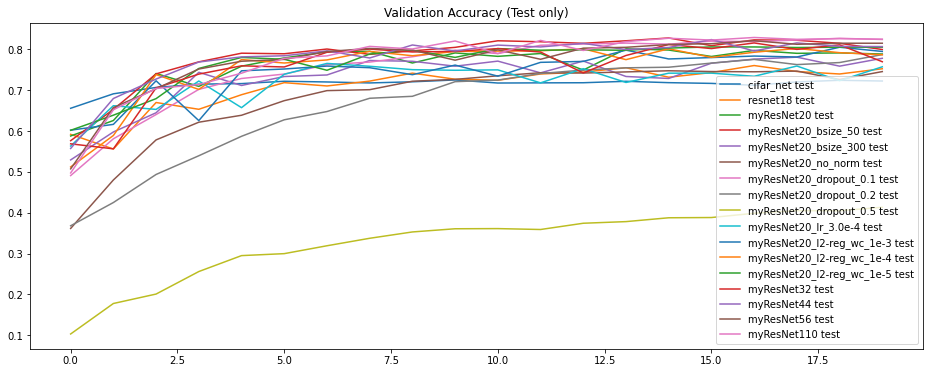

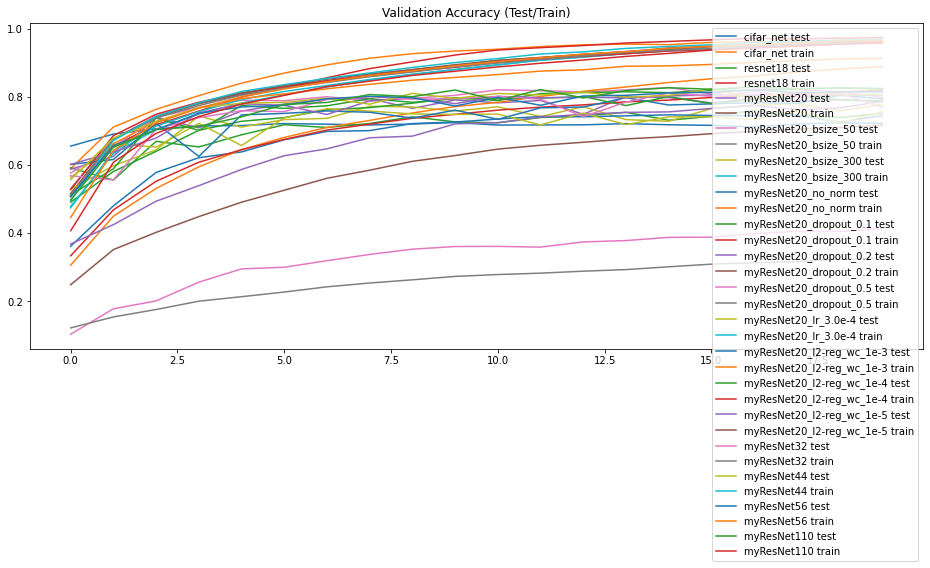

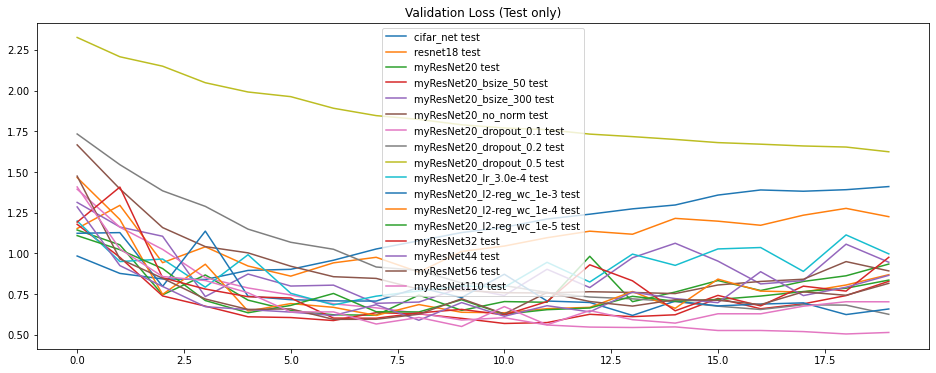

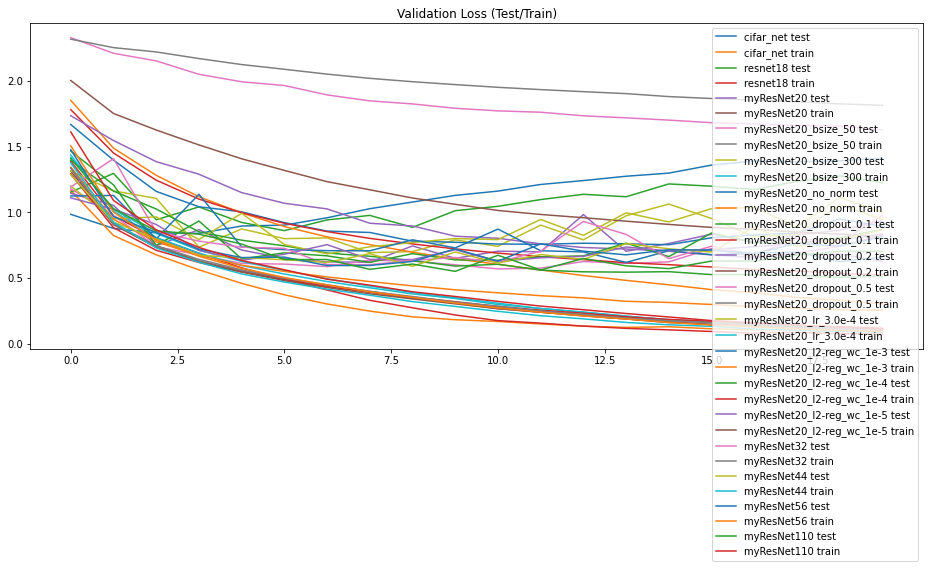

In [10]:
show_experiments_plots(accuracies, losses)

In [ ]:
from time import sleep
sleep(10000000)